In [76]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

In [3]:
df_train = pd.read_csv(r'C:\Users\anush\Downloads\Training.csv')
df_train.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
df_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [5]:
df_test = pd.read_csv(r'C:\Users\anush\Downloads\Testing.csv')
df_test.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [6]:
df_test.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [7]:
df_train = df_train.drop('Unnamed: 133',axis=1)
df_train


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [8]:
df_train.shape


(4920, 133)

In [9]:
df_train.isnull().any()


itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [10]:
df_train.isnull().sum()


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [11]:
df_train.info


<bound method DataFrame.info of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0

In [12]:
df_train.describe()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df_train.columns


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [14]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x=df_train.drop('prognosis',axis=1)
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [15]:
y=df_train['prognosis']
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [16]:
X=df_test.drop('prognosis',axis=1) 
Y=df_test['prognosis']            
np.max(x,axis=1)


0       1
1       1
2       1
3       1
4       1
       ..
4915    1
4916    1
4917    1
4918    1
4919    1
Length: 4920, dtype: int64

In [17]:
np.min(x,axis=1)


0       0
1       0
2       0
3       0
4       0
       ..
4915    0
4916    0
4917    0
4918    0
4919    0
Length: 4920, dtype: int64

In [18]:
np.std(x,axis=0)


itching                 0.344695
skin_rash               0.366380
nodal_skin_eruptions    0.146524
continuous_sneezing     0.207572
shivering               0.146524
                          ...   
small_dents_in_nails    0.150446
inflammatory_nails      0.150446
blister                 0.150446
red_sore_around_nose    0.150446
yellow_crust_ooze       0.150446
Length: 132, dtype: float64

In [19]:
np.std(x,axis=1)


0       0.171420
1       0.149033
2       0.149033
3       0.149033
4       0.149033
          ...   
4915    0.208299
4916    0.171420
4917    0.171420
4918    0.208299
4919    0.190903
Length: 4920, dtype: float64

In [20]:
correlation_matrix = x.corr()
correlation_matrix

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


In [21]:
prognosis_counts=df_train['prognosis'].value_counts()
prognosis_counts

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [22]:
label = prognosis_counts.index
value_count = prognosis_counts.values

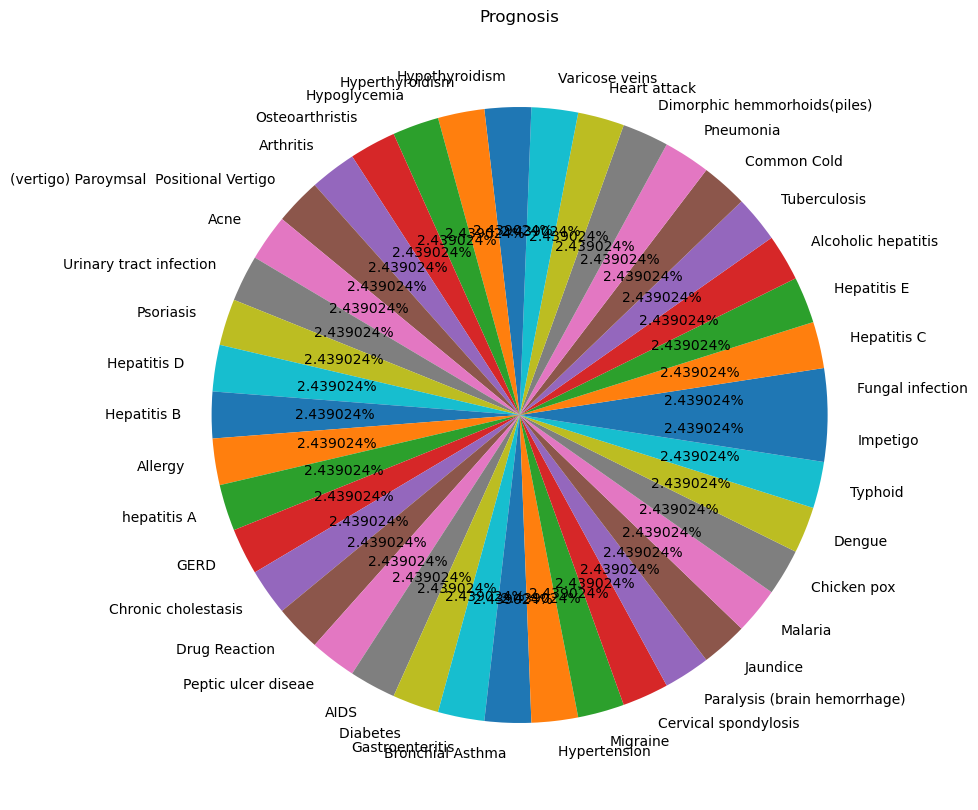

In [23]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14,10))
plt.pie(value_count,labels=label,autopct='%1f%%')
plt.title('Prognosis')
plt.show()

<Axes: >

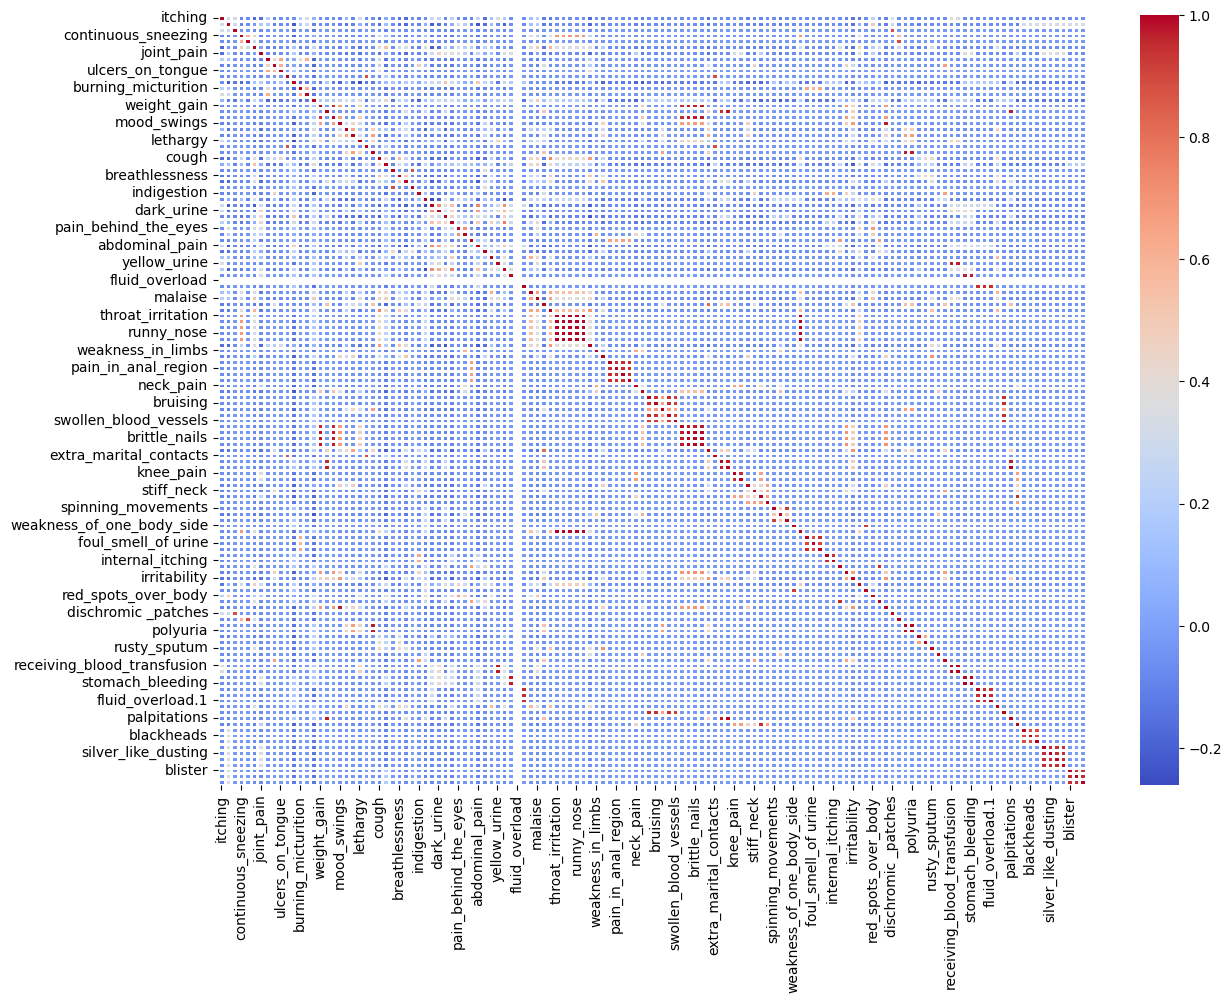

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(x.corr(),annot=False,linewidth=1 , cmap ='coolwarm')

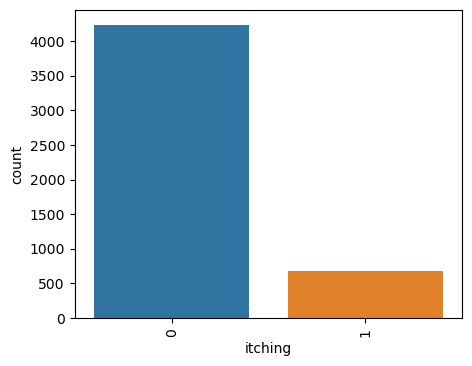

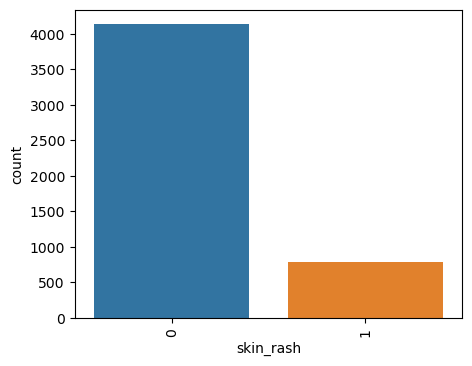

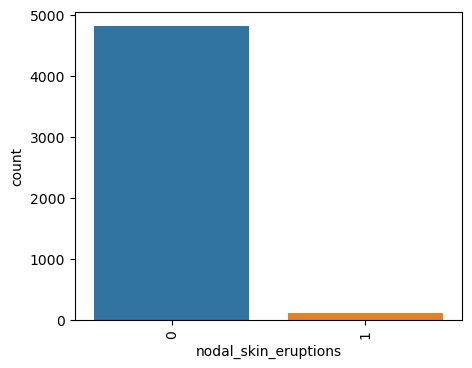

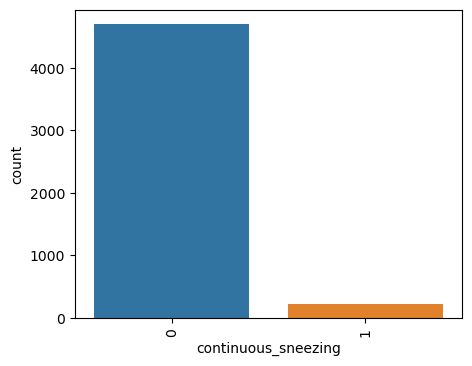

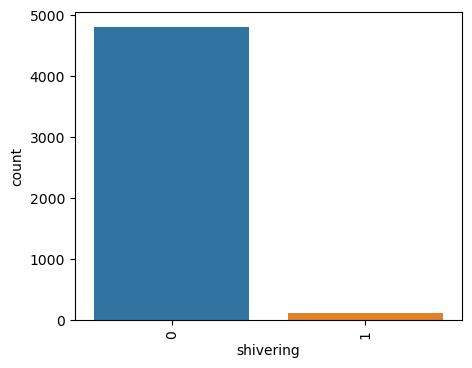

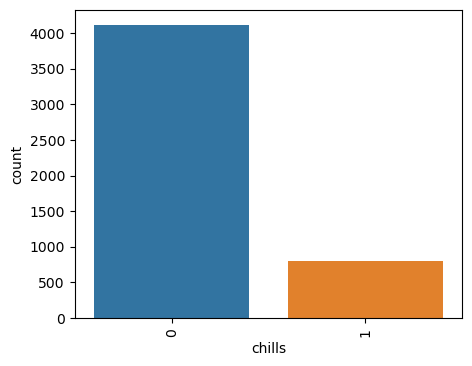

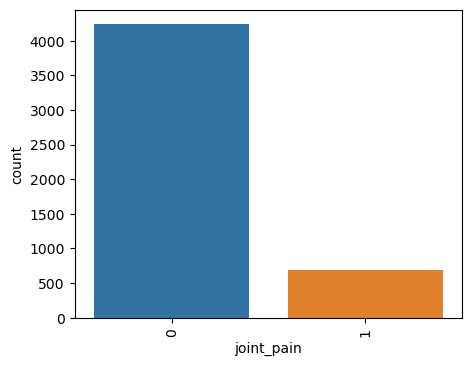

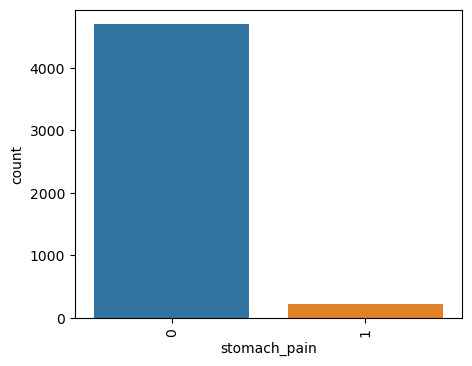

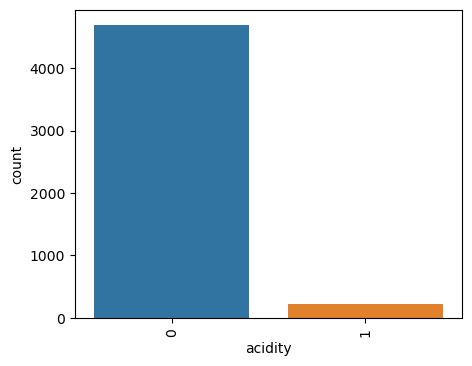

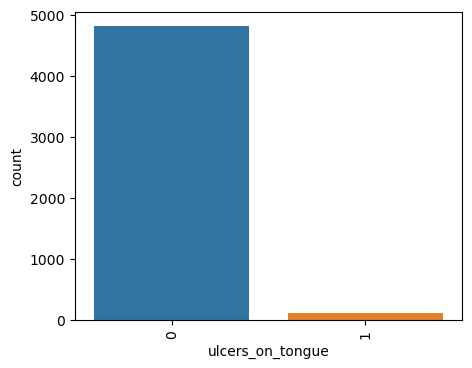

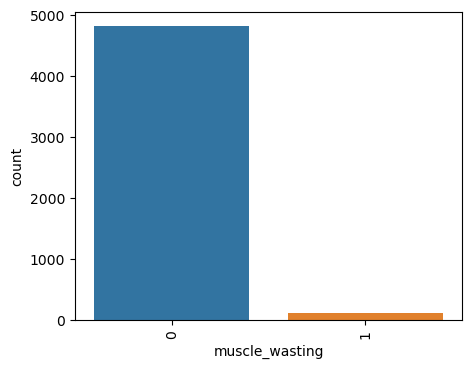

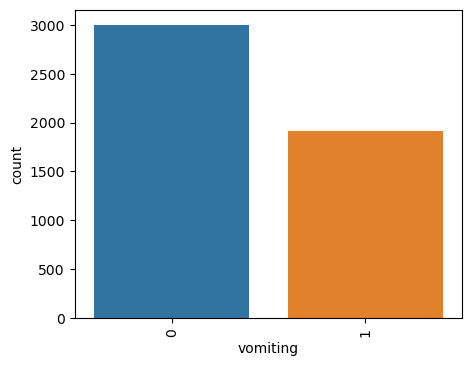

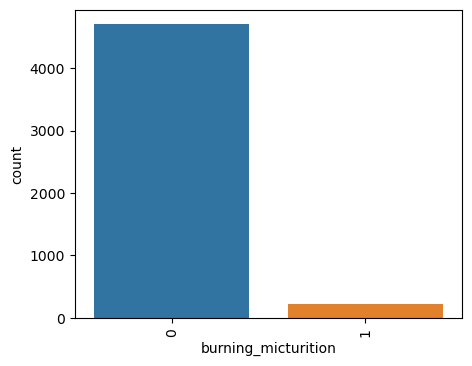

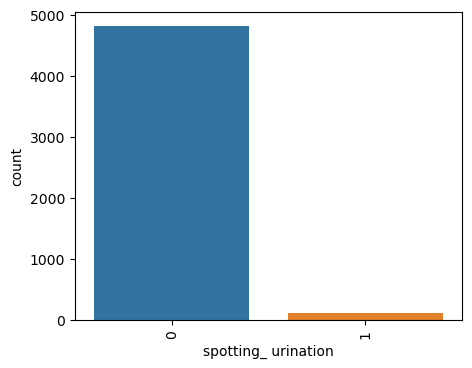

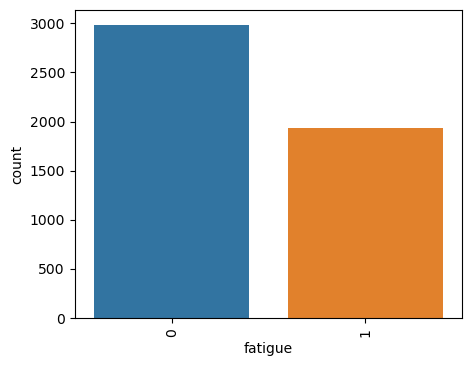

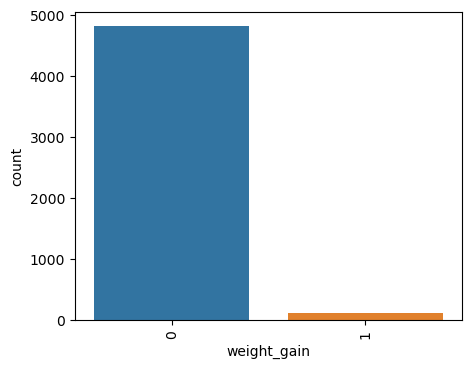

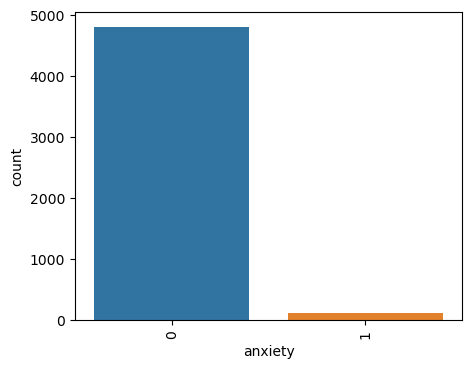

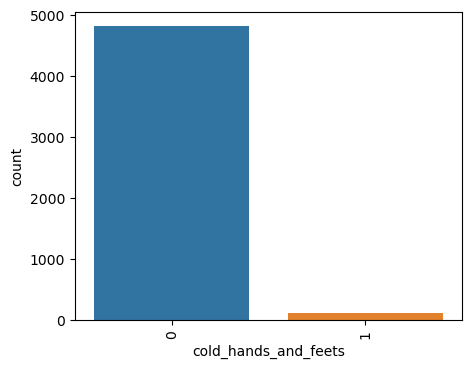

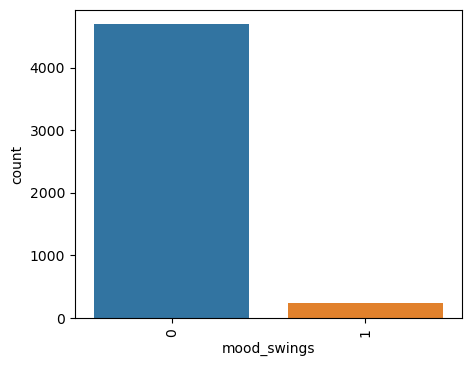

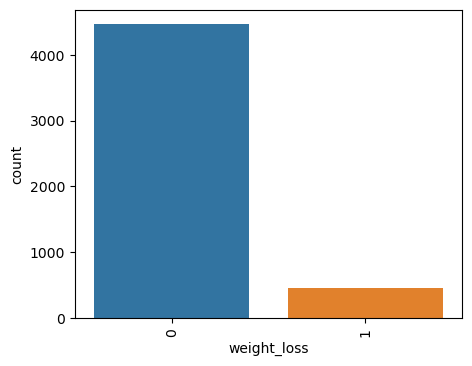

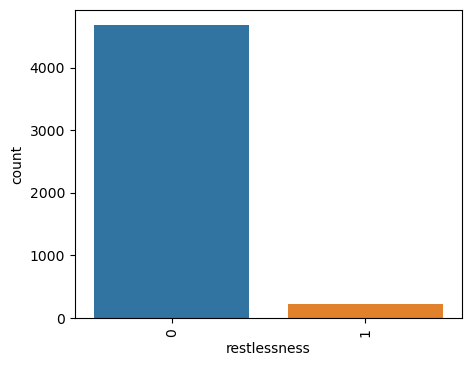

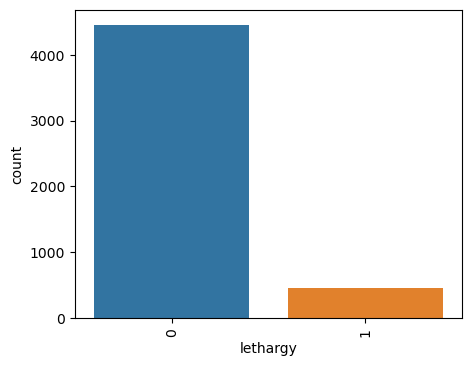

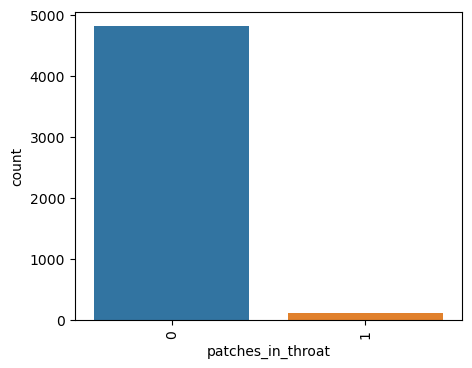

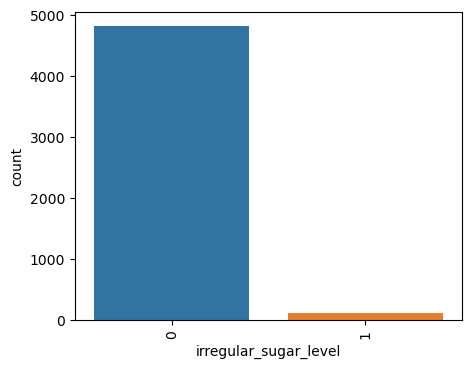

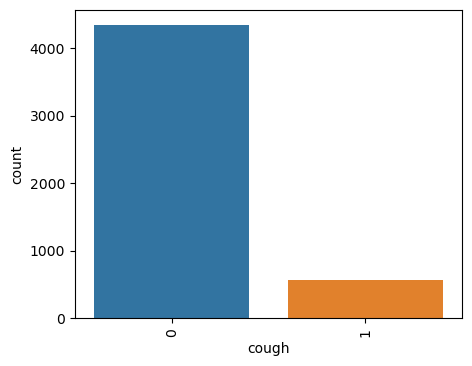

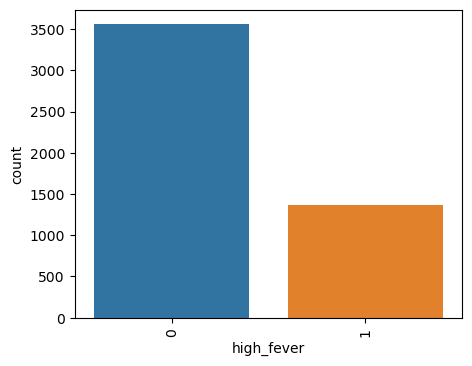

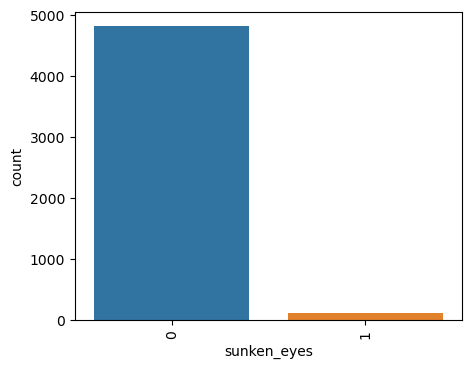

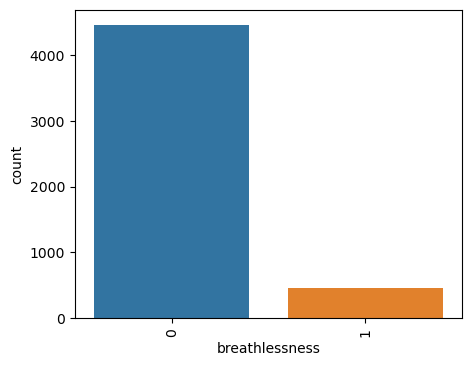

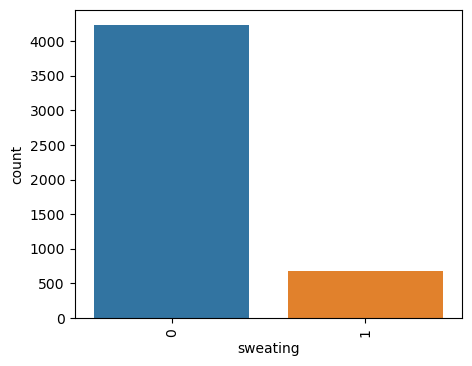

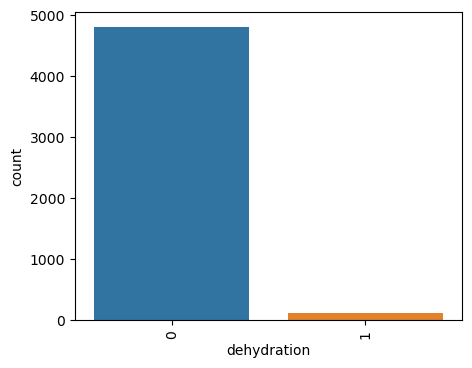

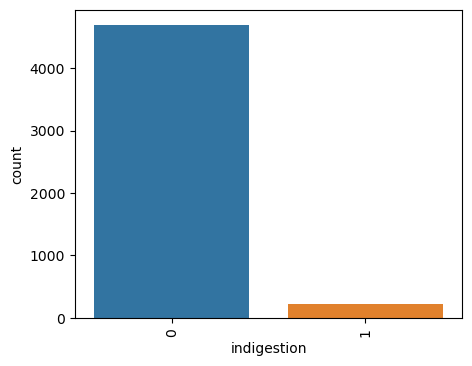

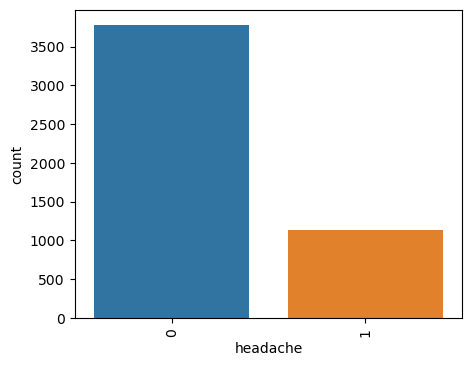

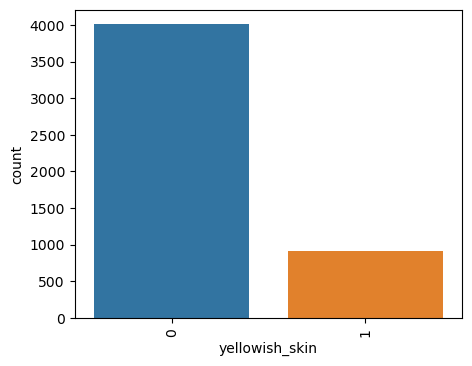

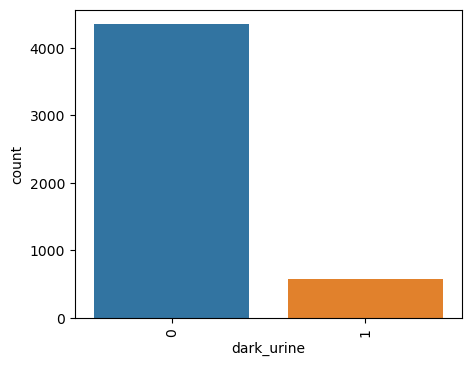

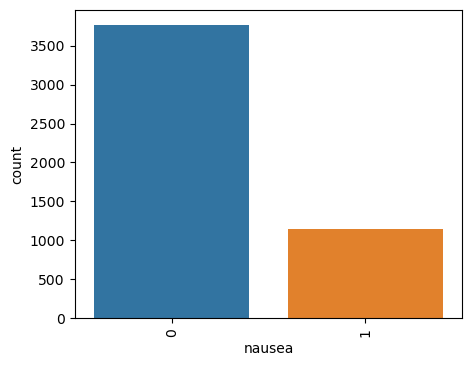

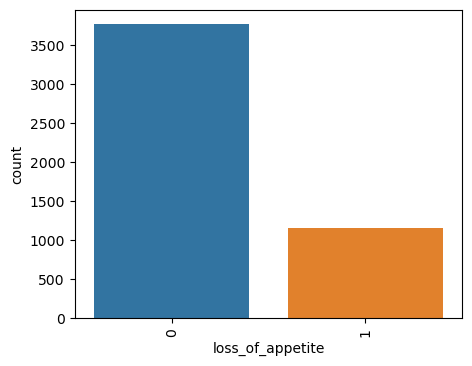

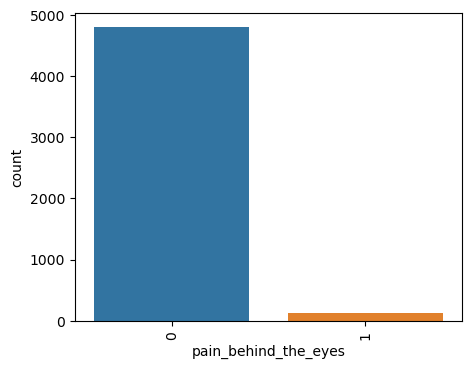

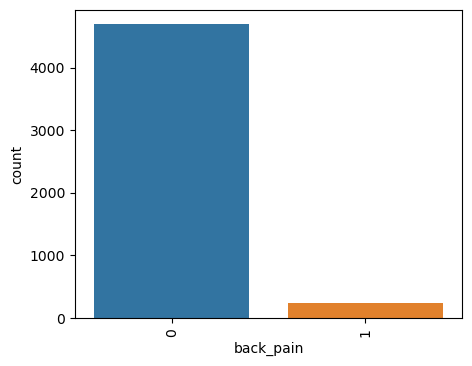

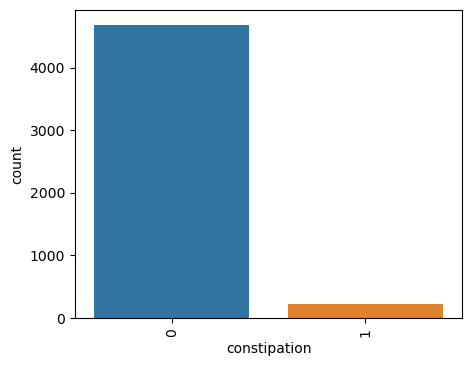

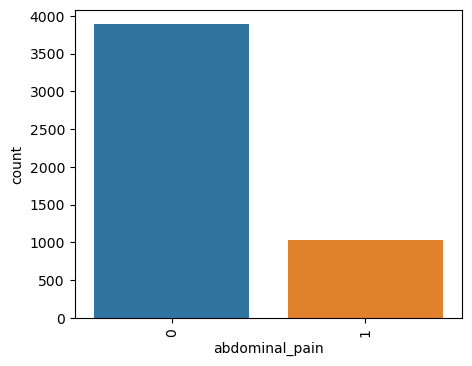

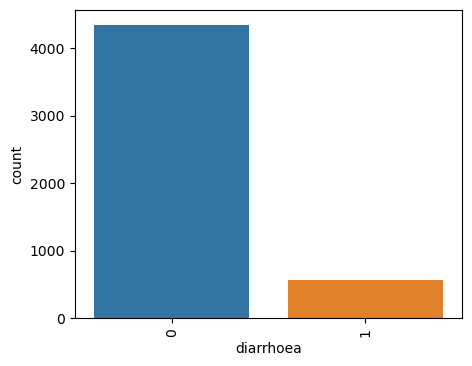

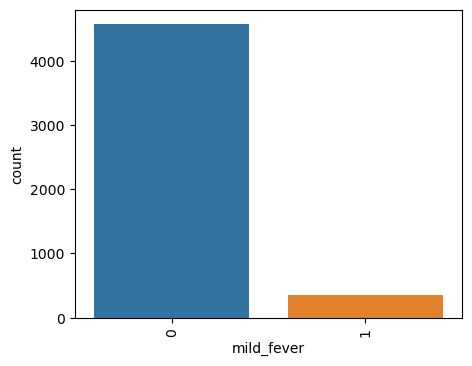

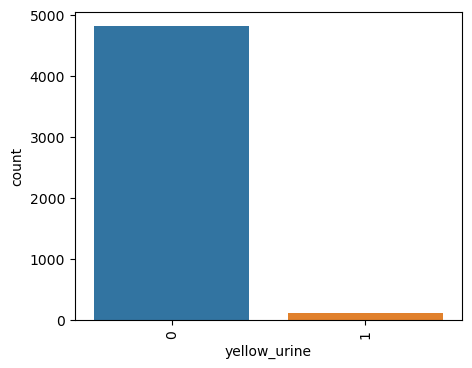

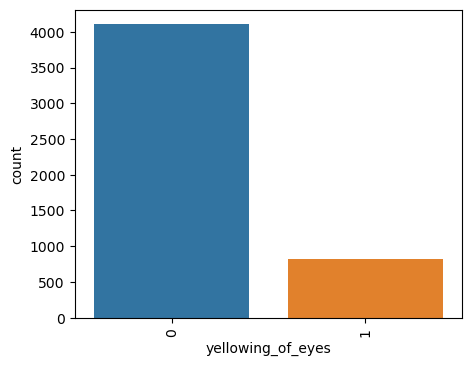

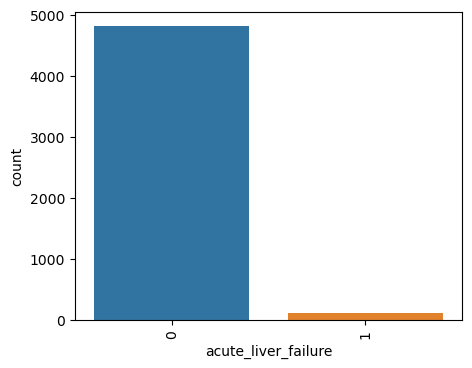

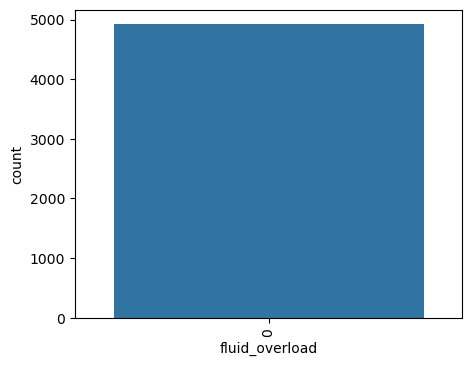

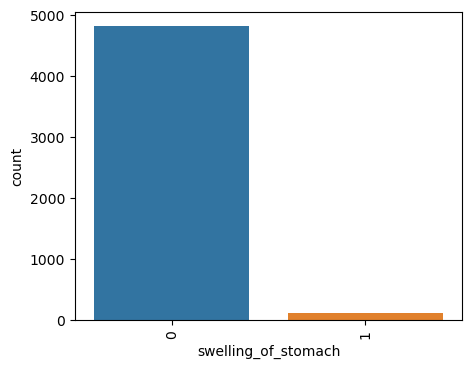

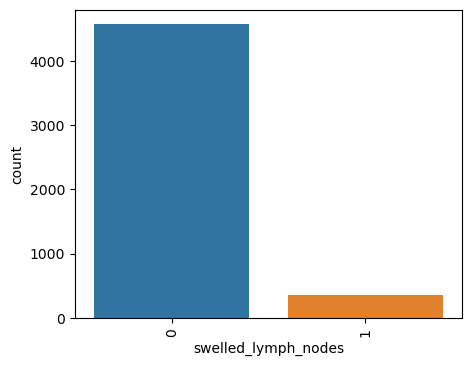

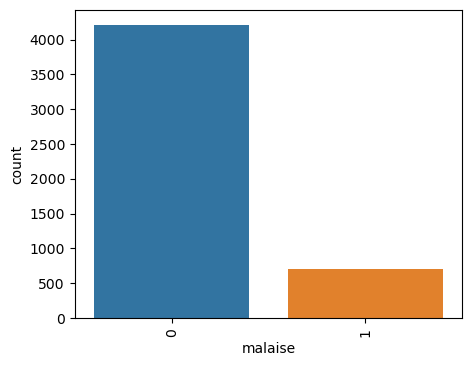

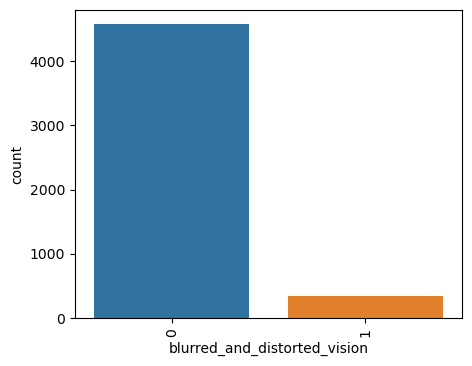

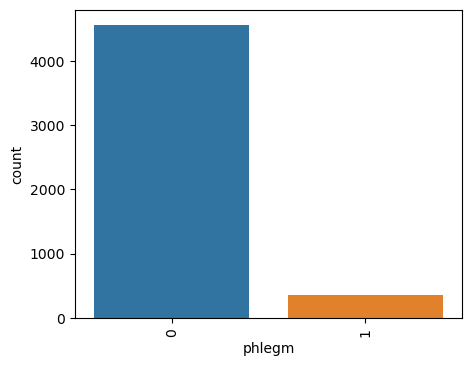

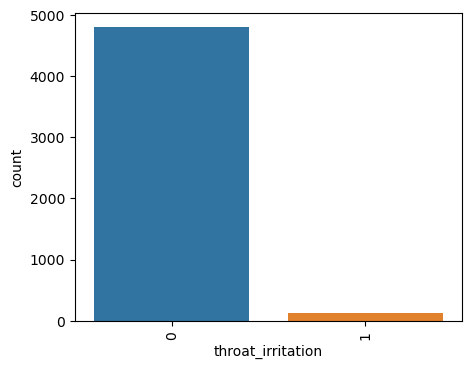

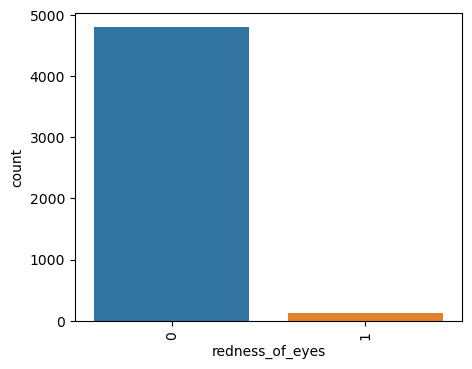

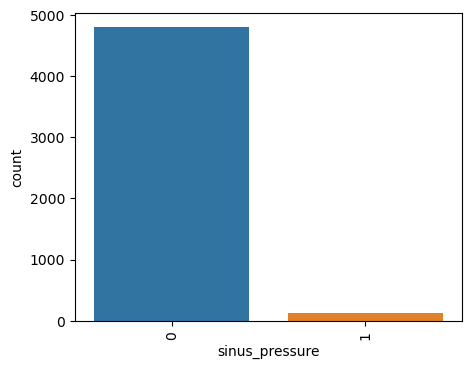

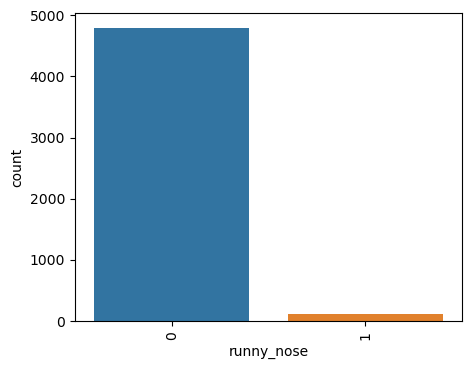

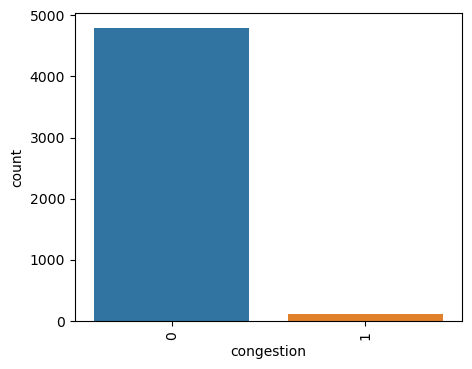

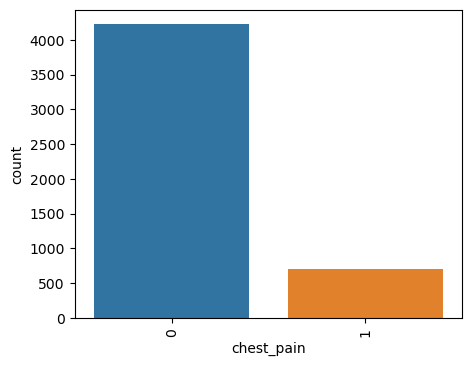

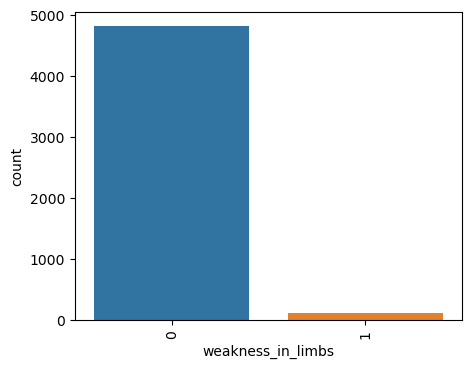

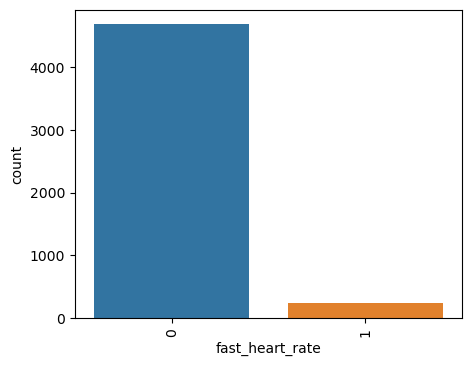

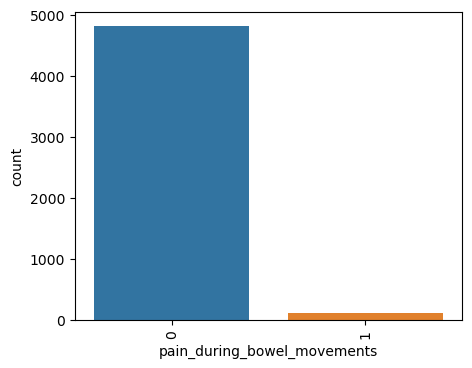

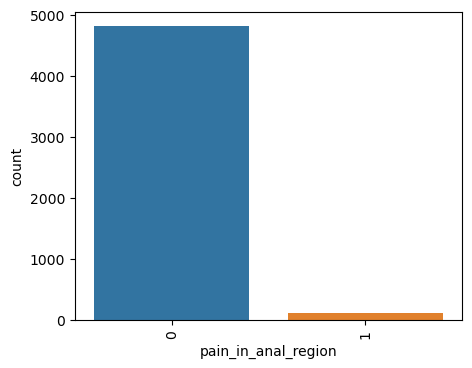

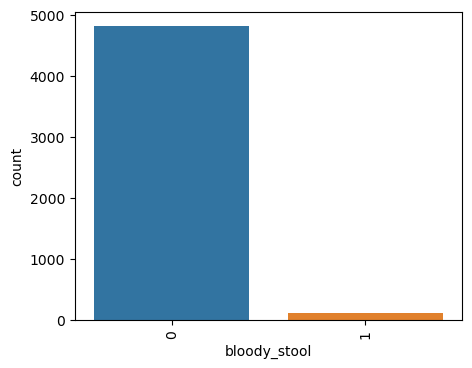

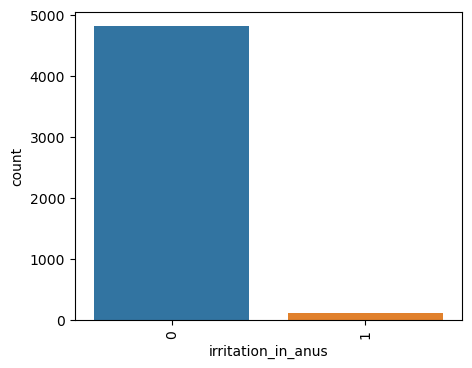

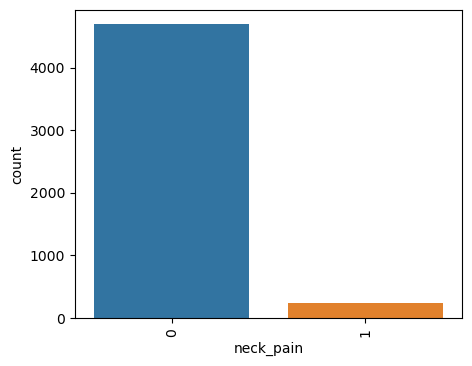

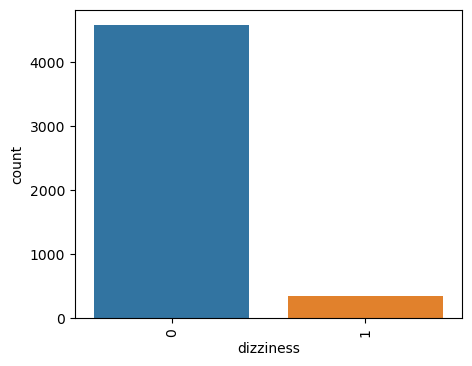

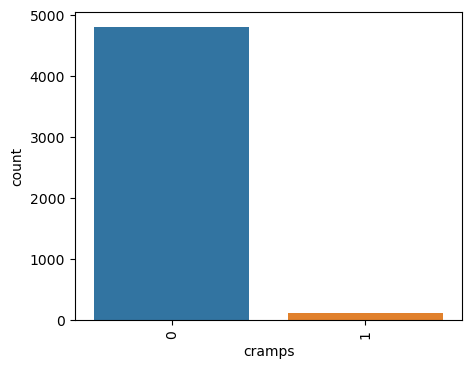

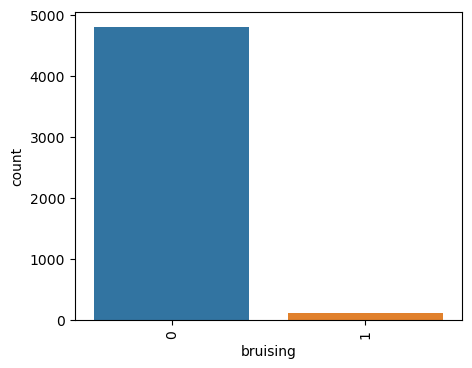

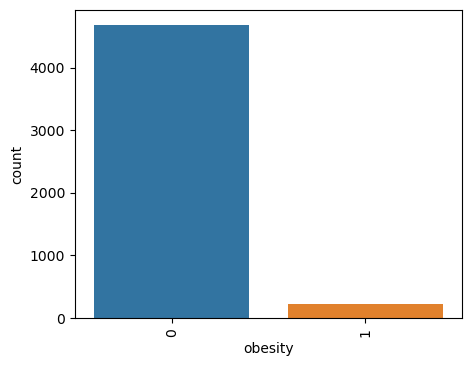

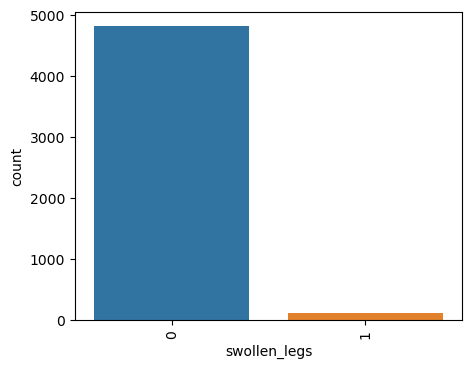

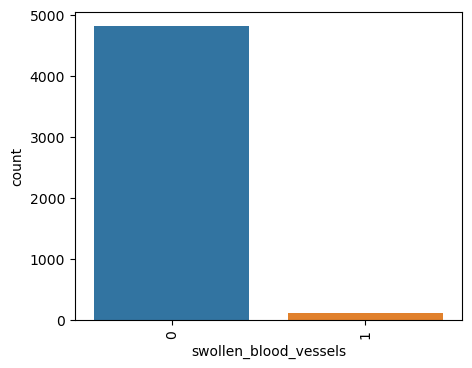

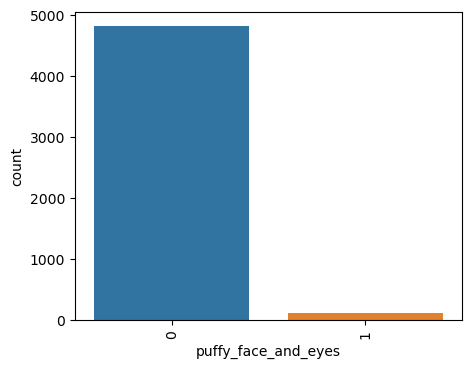

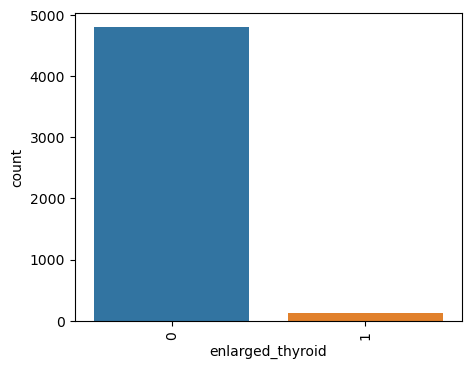

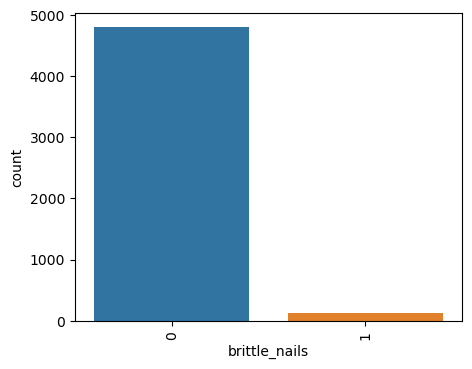

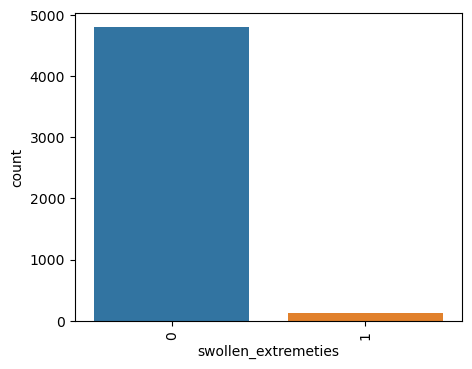

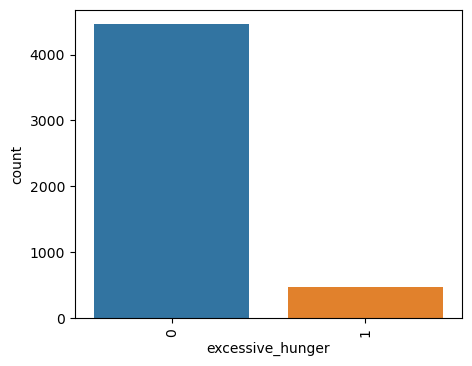

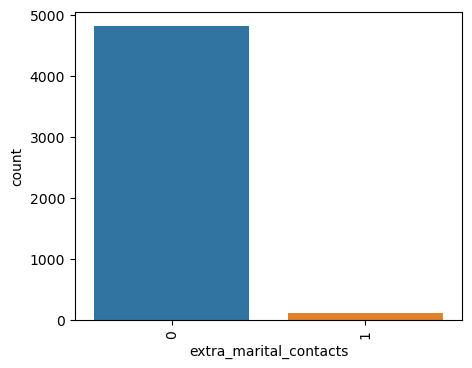

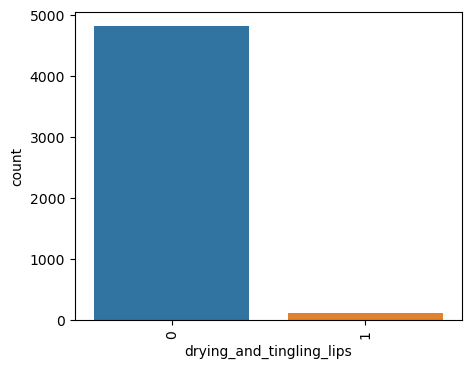

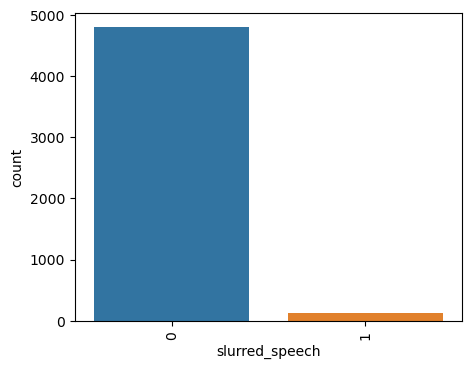

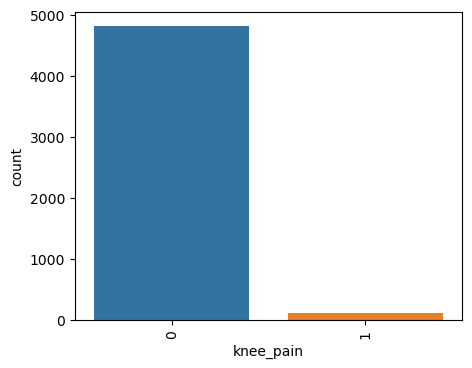

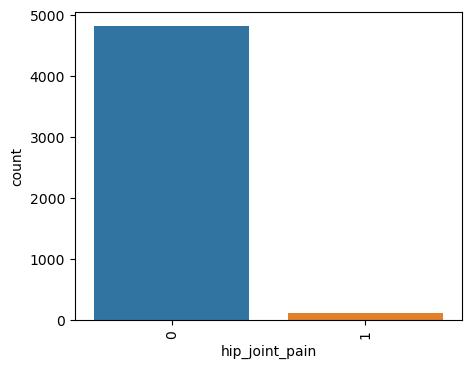

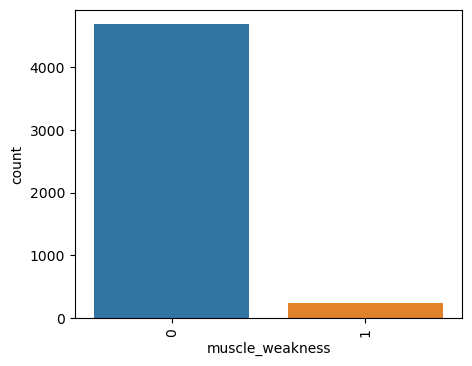

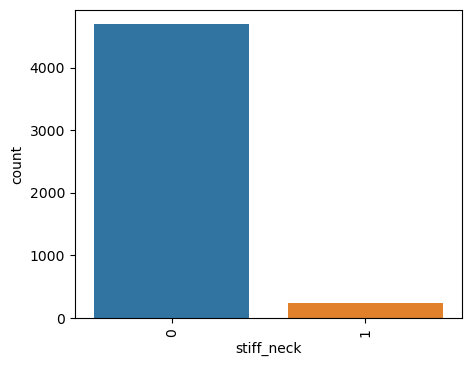

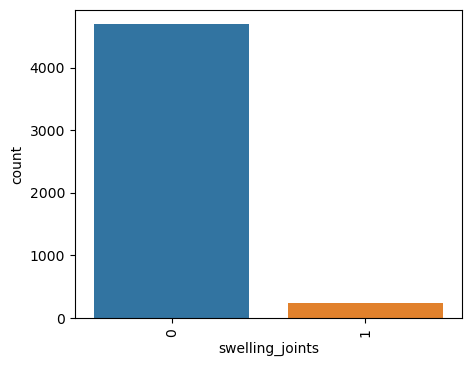

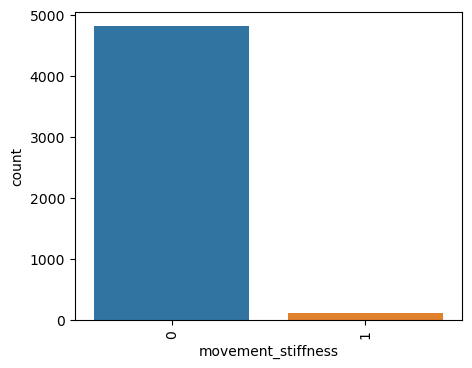

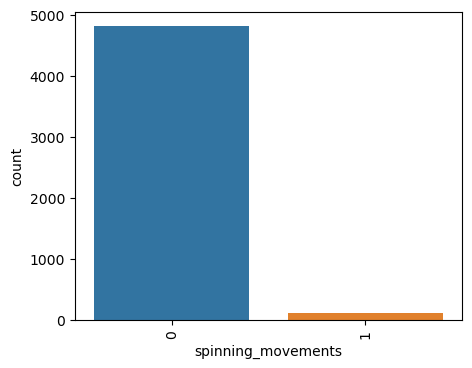

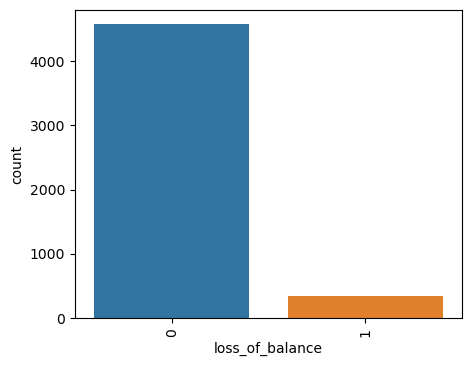

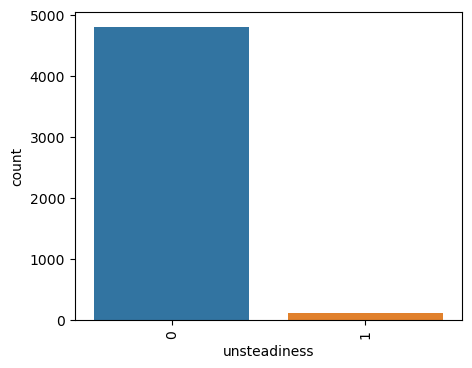

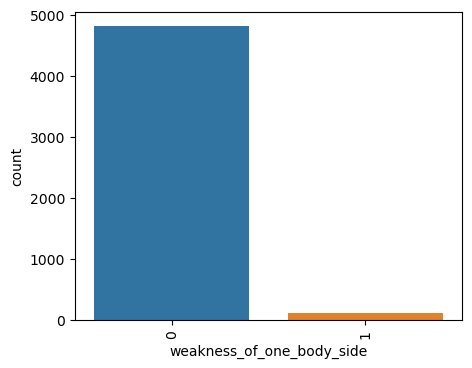

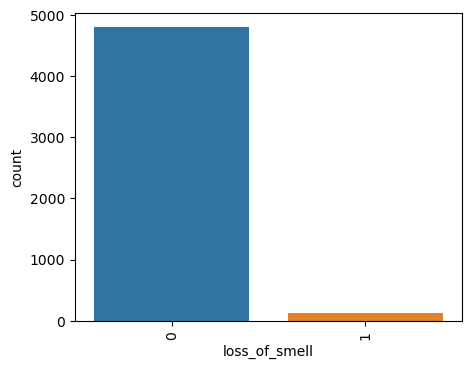

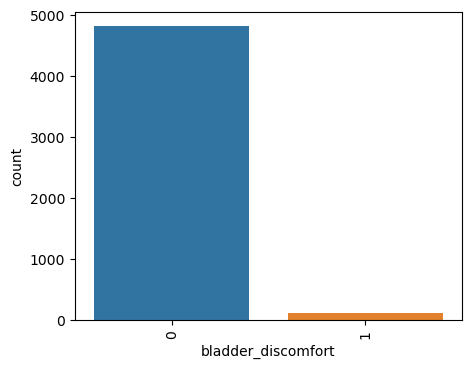

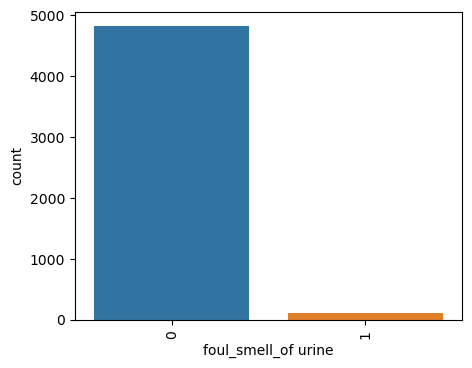

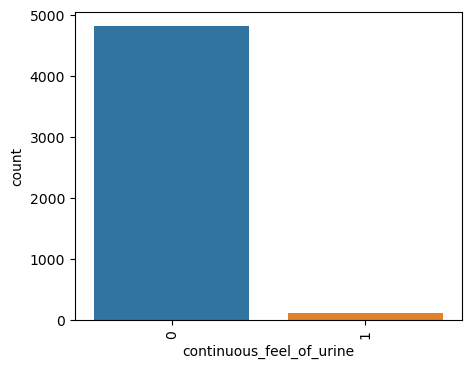

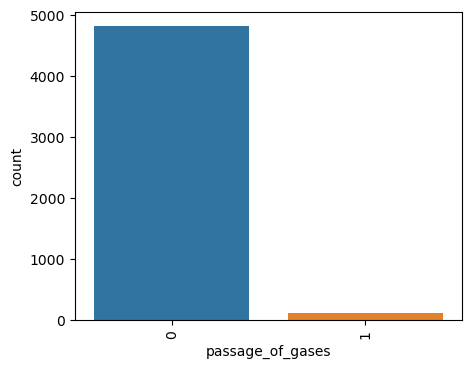

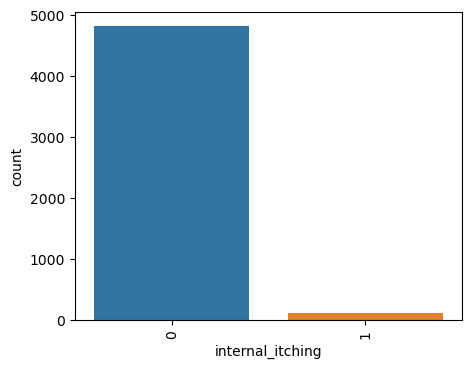

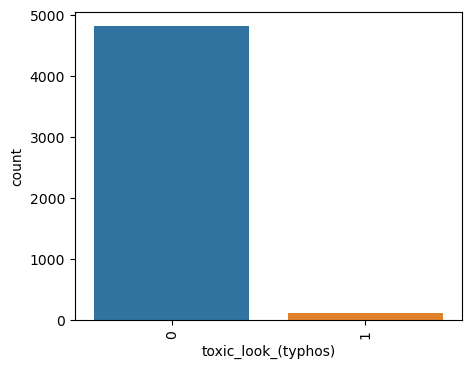

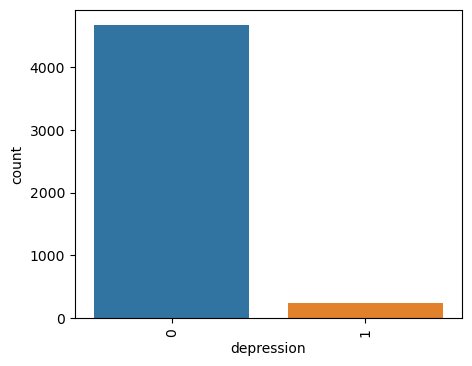

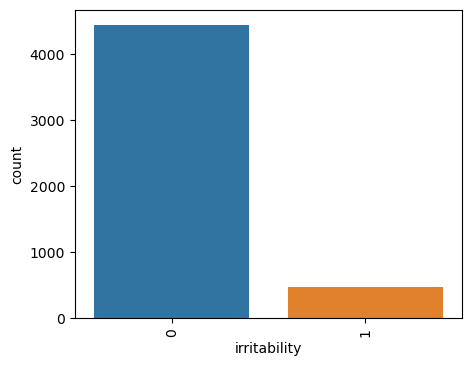

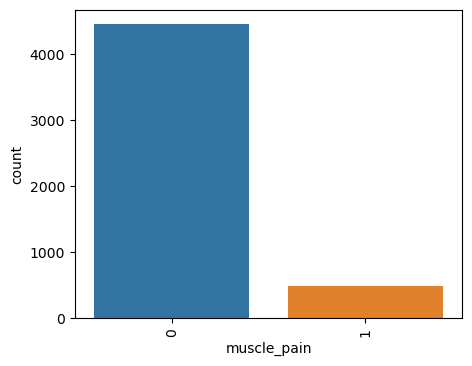

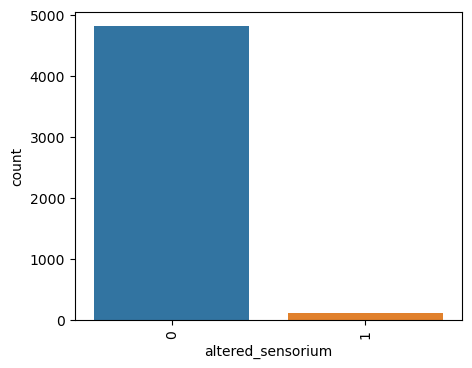

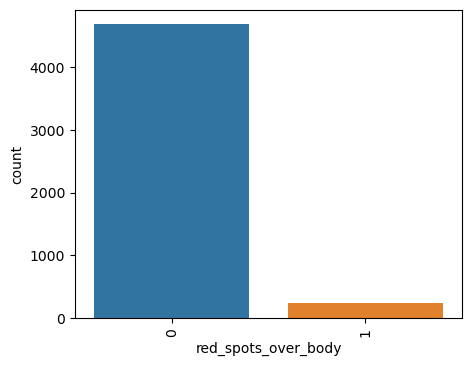

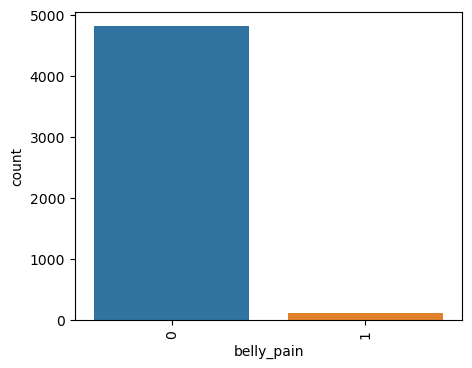

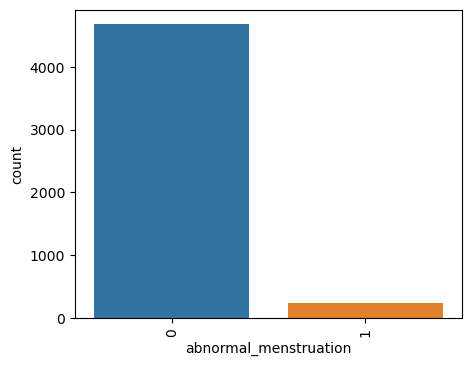

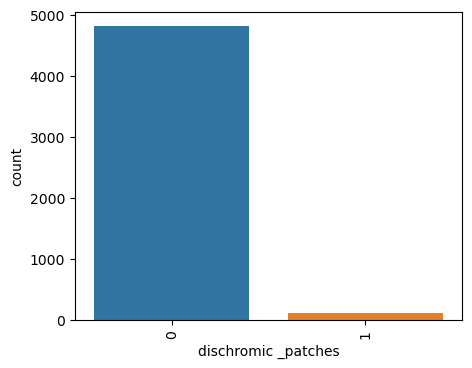

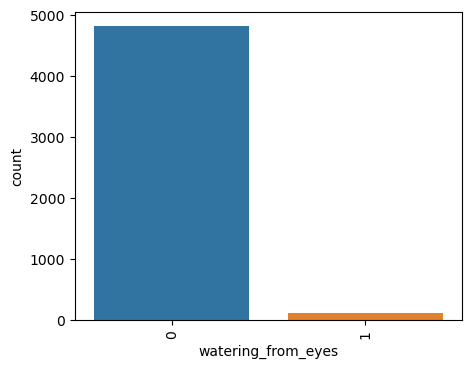

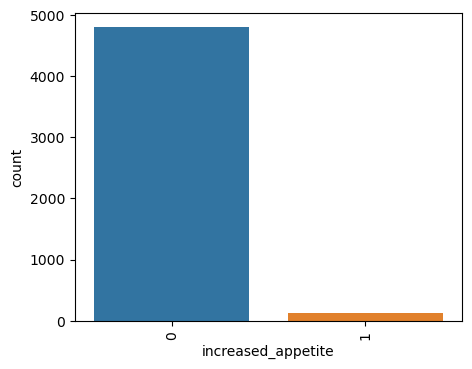

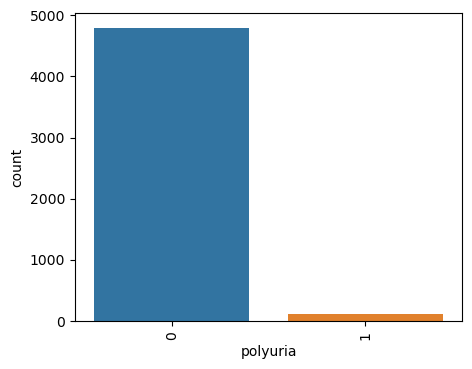

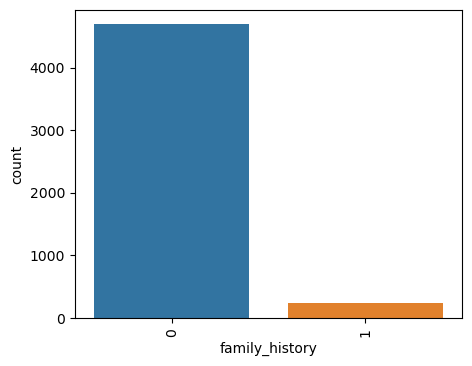

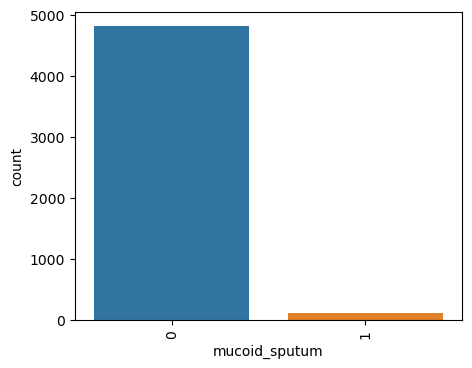

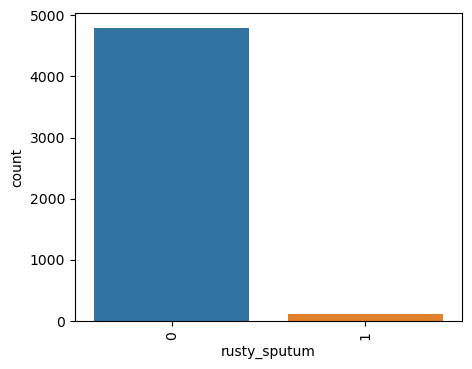

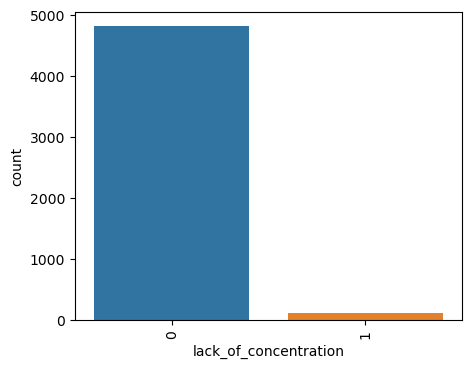

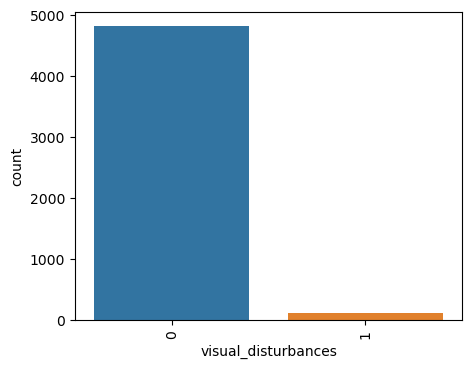

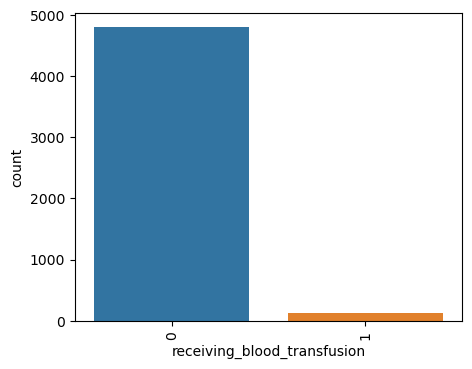

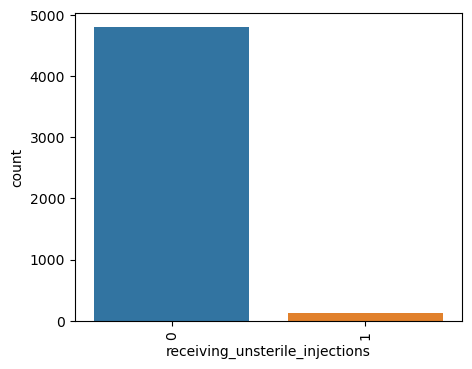

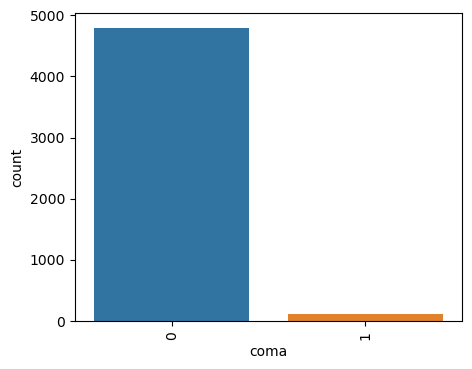

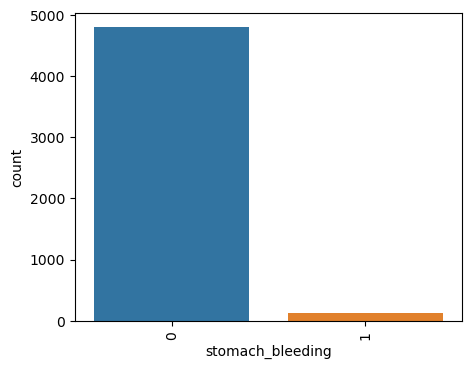

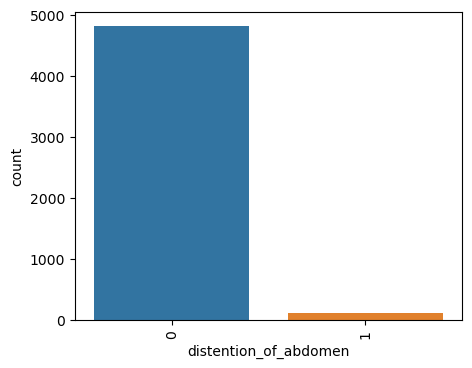

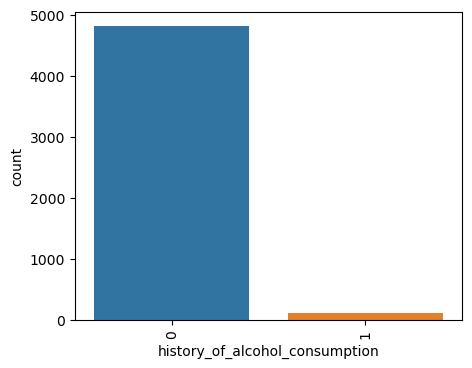

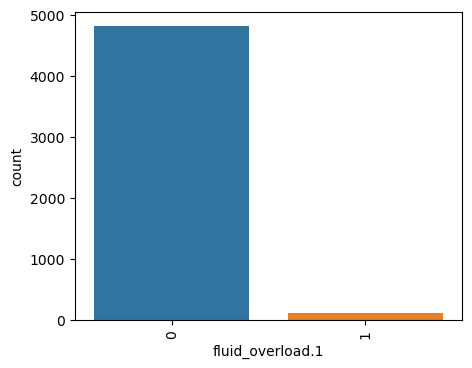

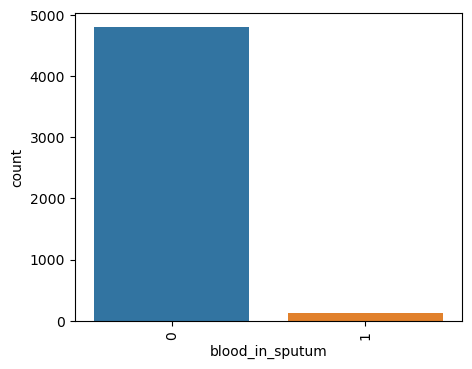

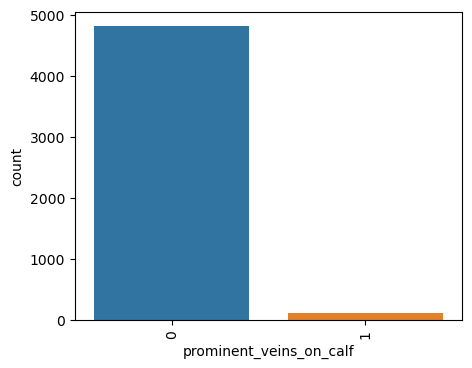

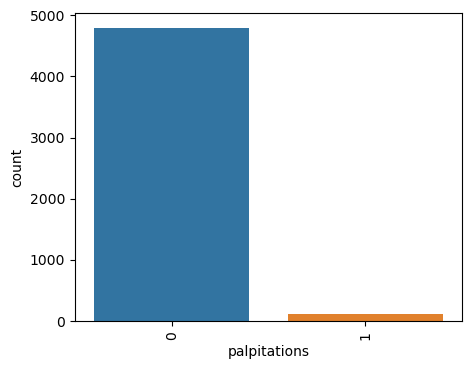

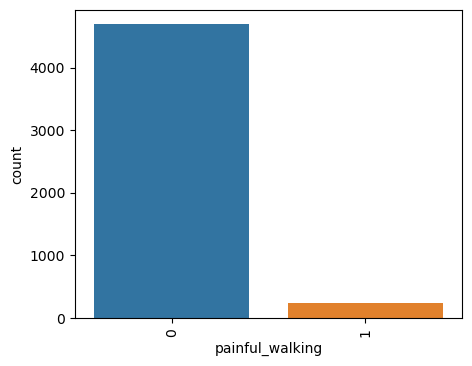

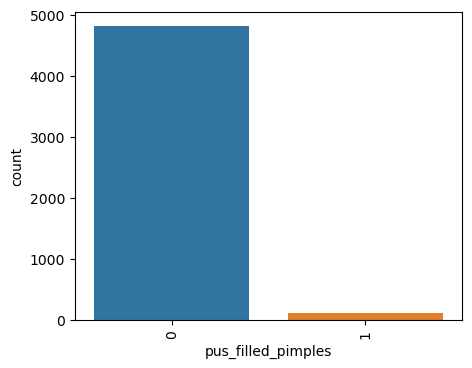

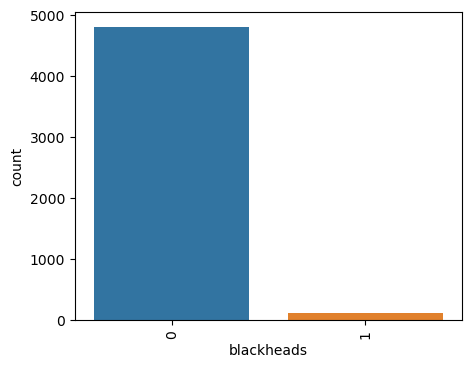

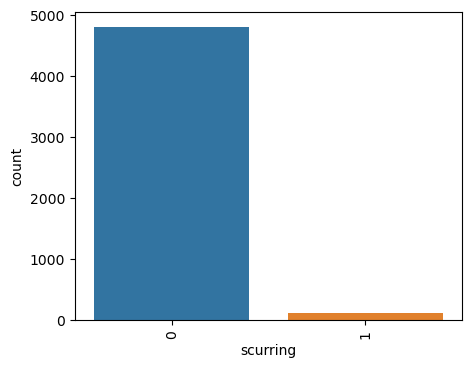

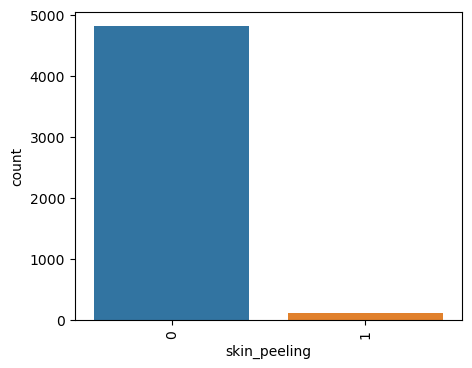

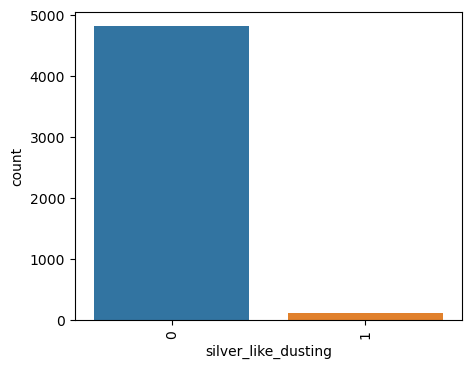

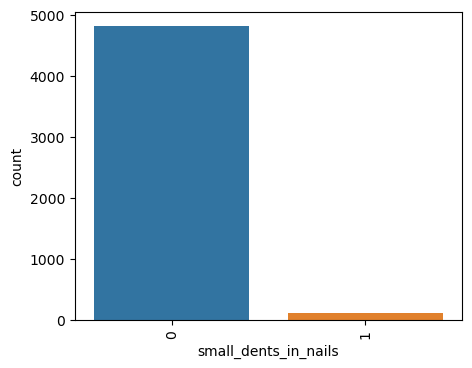

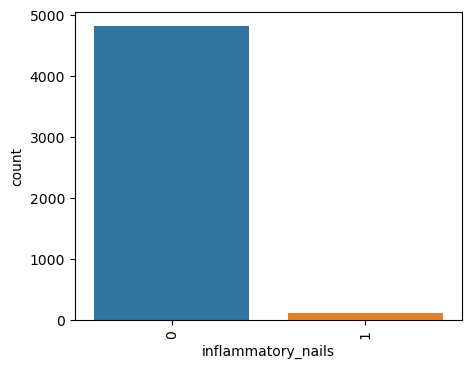

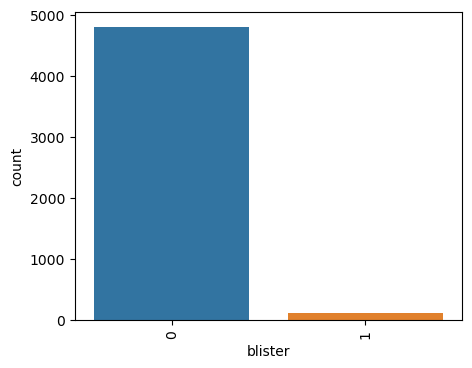

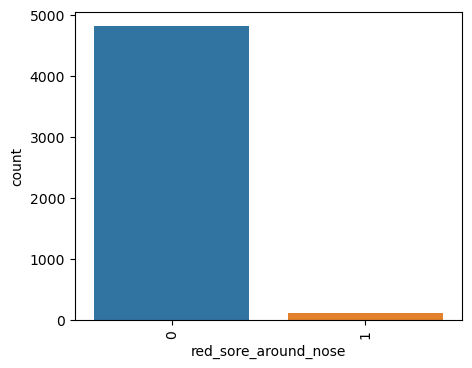

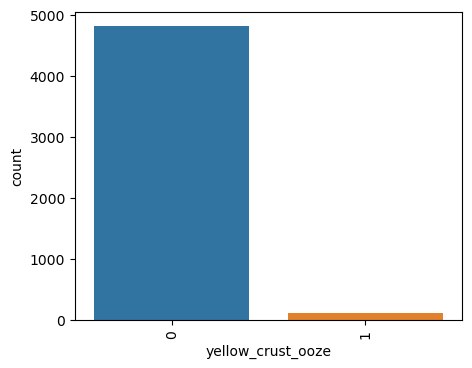

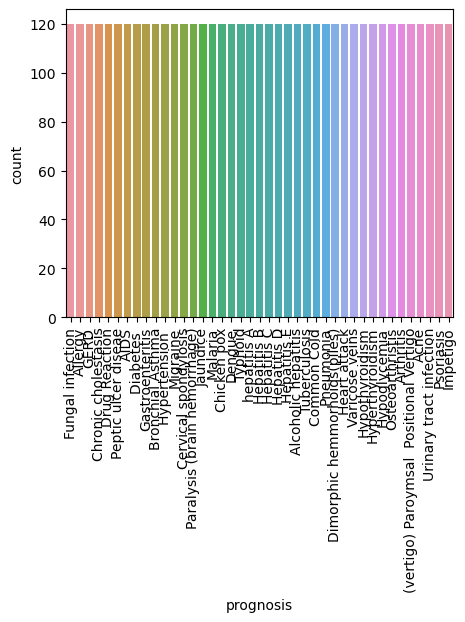

In [25]:
for column in df_train.columns:
    fig=plt.figure(figsize=(5,4))
    sns.countplot(data=df_train,x=column)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.show()

C:\Users\anush\desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='itching', ylabel='Count'>

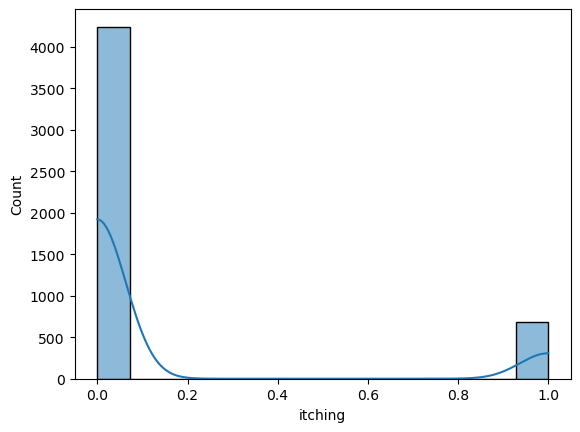

In [26]:
sns.histplot(x='itching',data = df_train,kde=True)


<Axes: xlabel='skin_rash', ylabel='itching'>

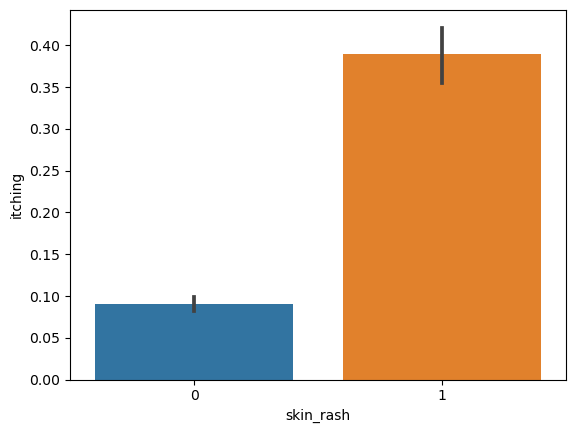

In [48]:
sns.barplot(x=df_train["skin_rash"] ,   
            y=df_train["itching"] ,       
            data=df_train,)

<Axes: xlabel='small_dents_in_nails', ylabel='inflammatory_nails'>

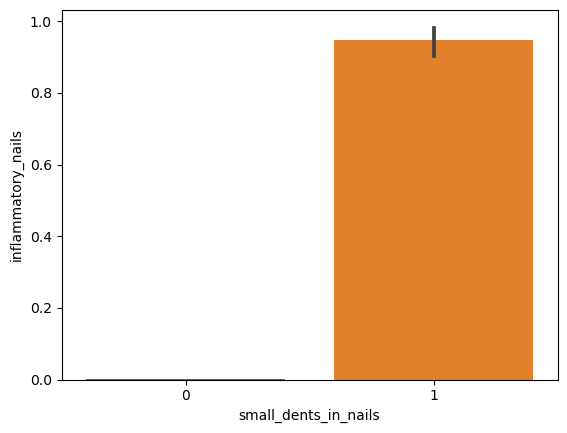

In [28]:
sns.barplot(x=df_train["small_dents_in_nails"] , y=df_train["inflammatory_nails"] , data=df_train)

<Axes: xlabel='red_sore_around_nose', ylabel='continuous_sneezing'>

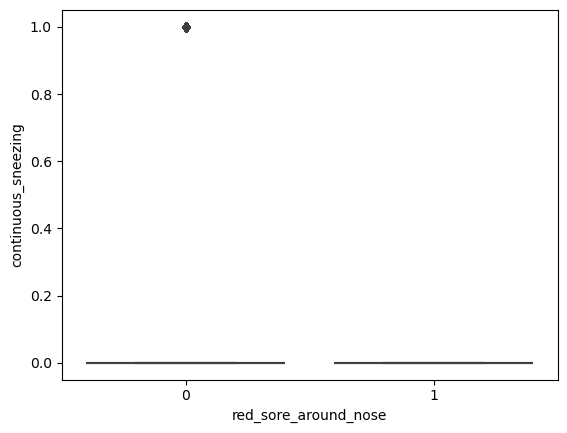

In [29]:
sns.boxplot(x=df_train["red_sore_around_nose"] , y=df_train["continuous_sneezing"] , data=df_train)

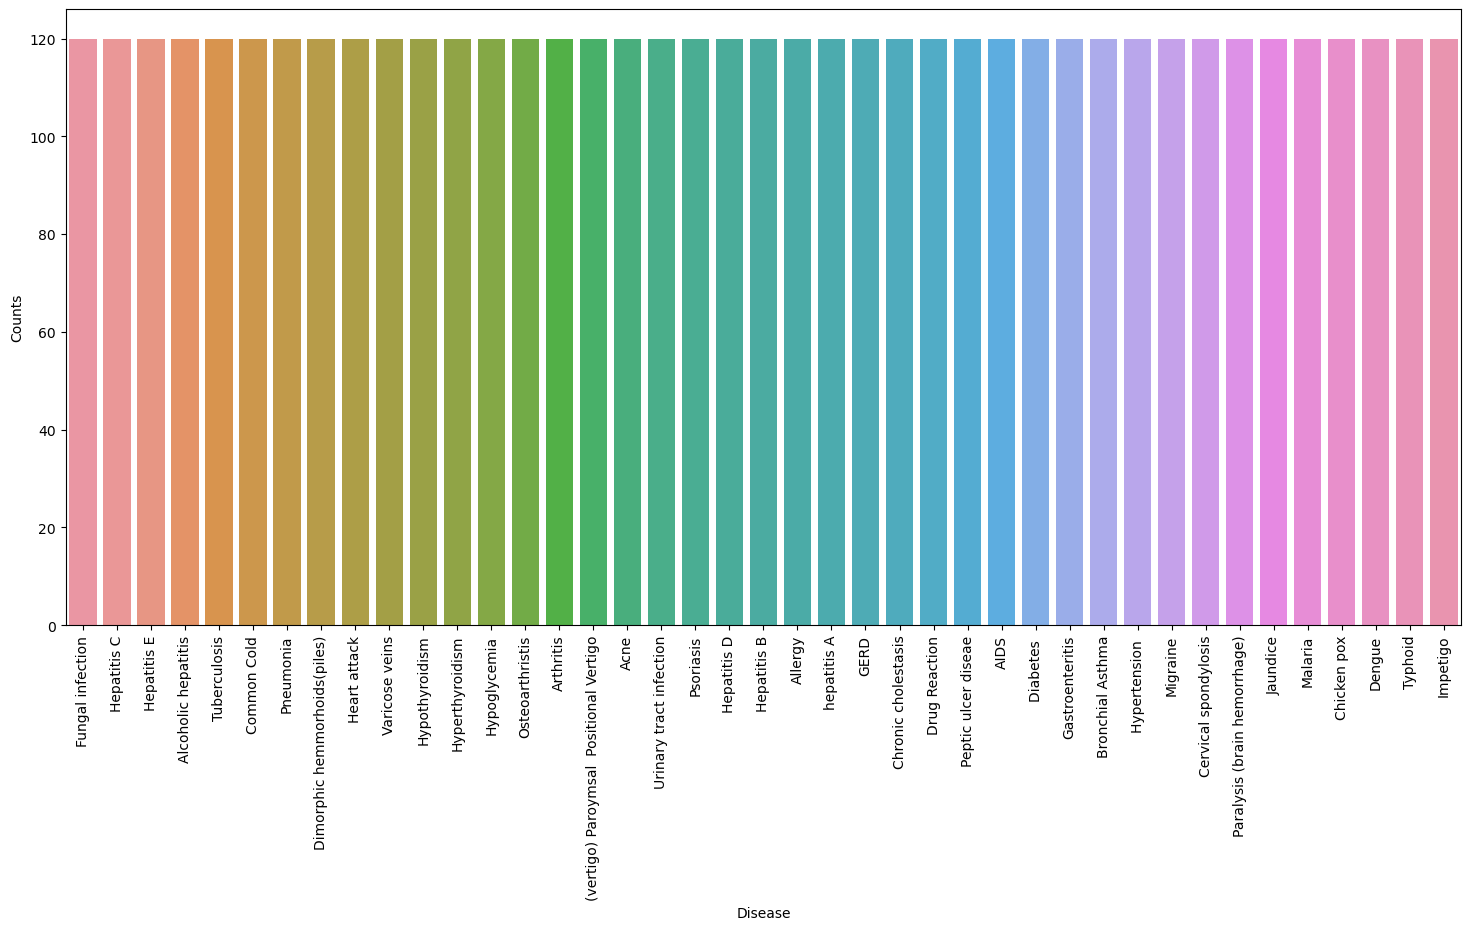

In [30]:
DATA_PATH = "C:/Users/anush/Downloads/Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize=(18, 8))
sns.barplot(x="Disease", y="Counts", data=temp_df)
plt.xticks(rotation=90)
plt.show()


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


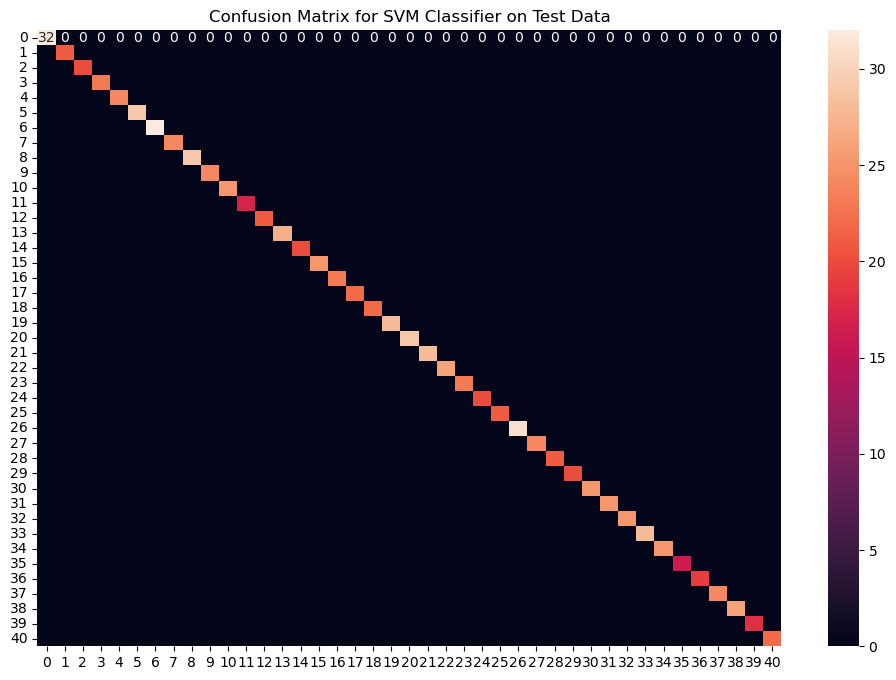

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


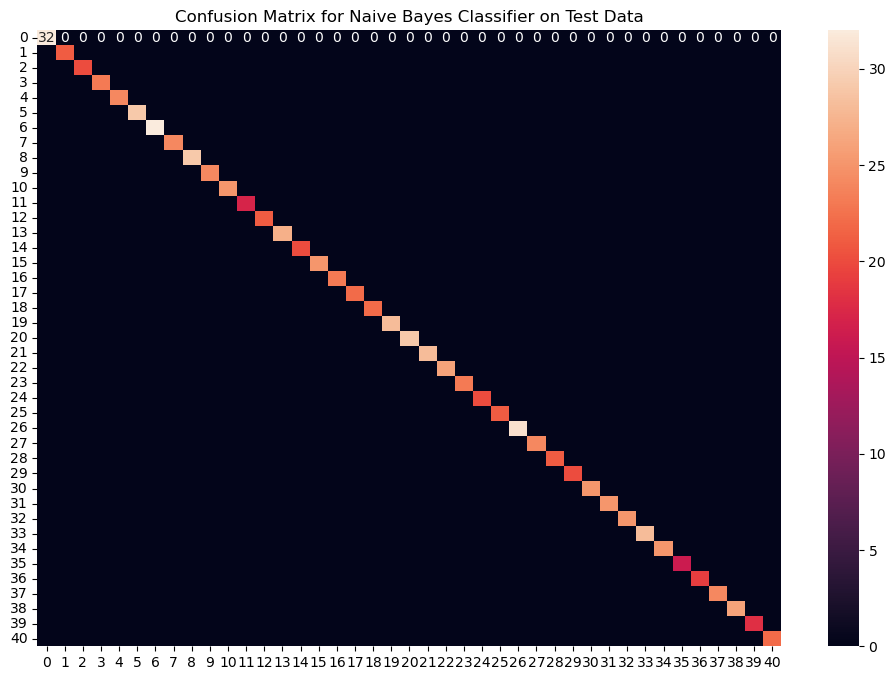

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


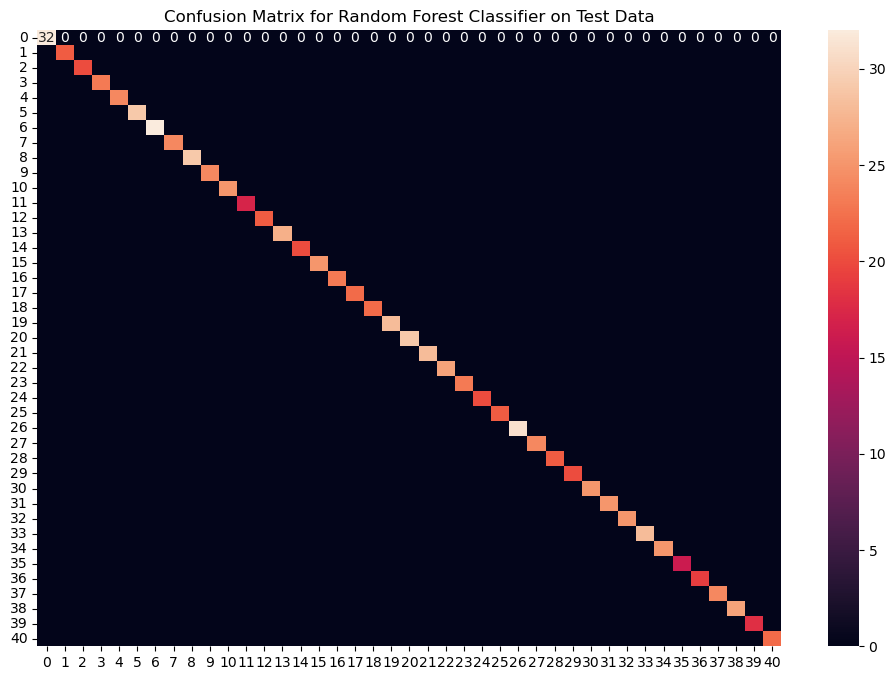

In [34]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings
warnings.filterwarnings("ignore")

# Your classifier evaluation code
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


Accuracy on Test dataset by the combined model: 100.0


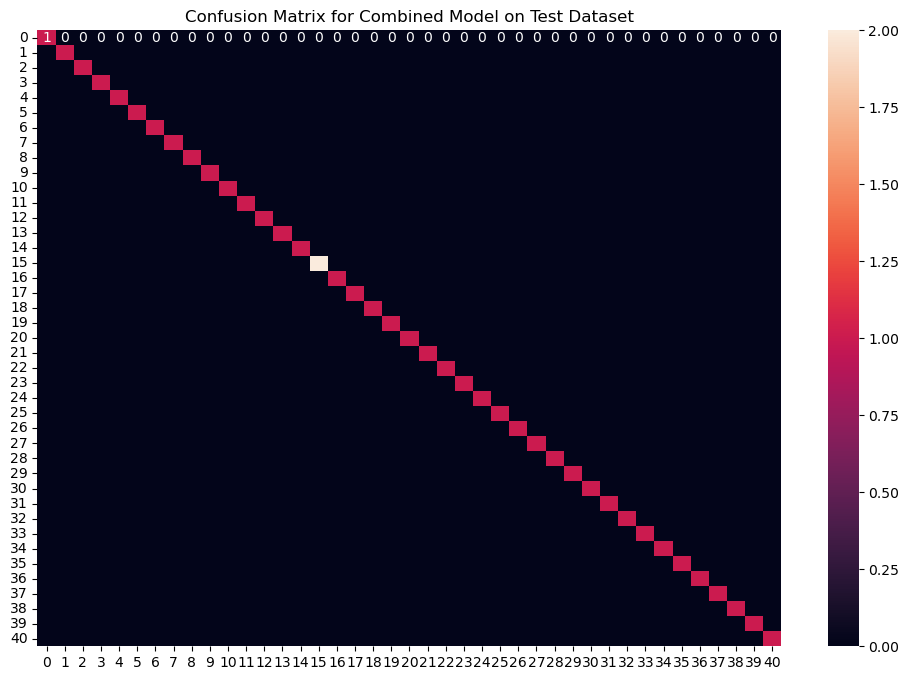

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from statistics import mode

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Define your models
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

# Fit models
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Read test data
test_data = pd.read_csv("C:/Users/anush/Downloads/Testing.csv").dropna(axis=1)
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Make predictions
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Combine predictions using mode
final_preds = [mode([i,j,k]) for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

# Evaluate combined model
print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

# Visualize confusion matrix
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


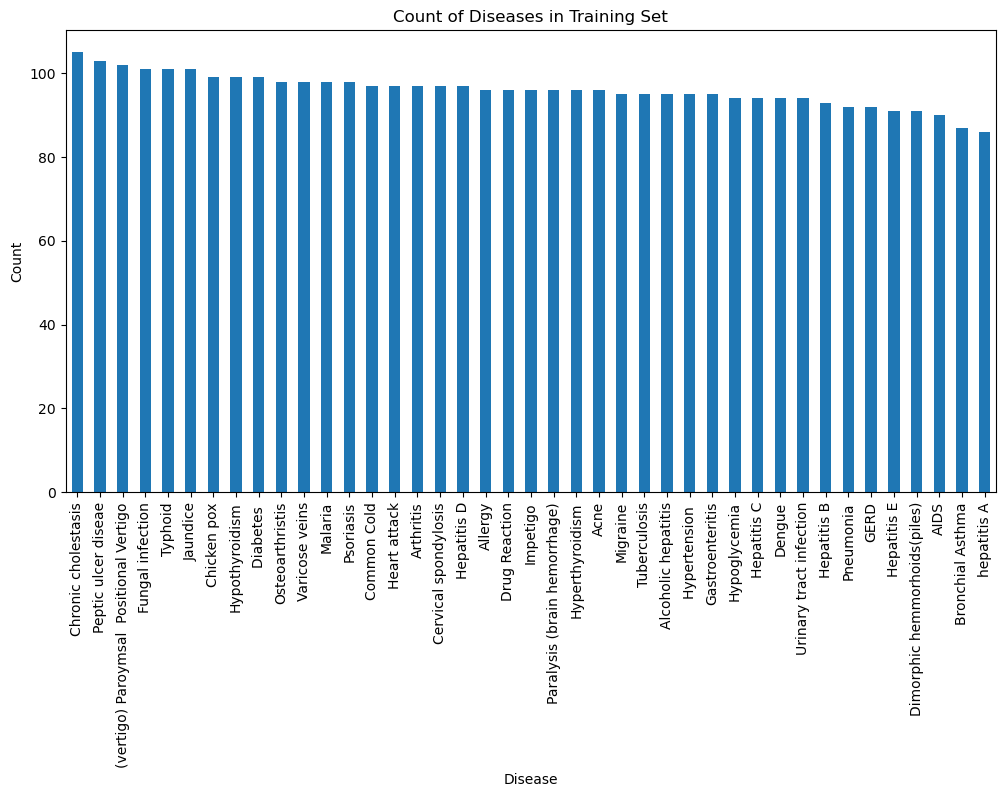

In [71]:
# Bar Chart
plt.figure(figsize=(12, 6))
y_train.value_counts().plot(kind='bar')
plt.title('Count of Diseases in Training Set')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

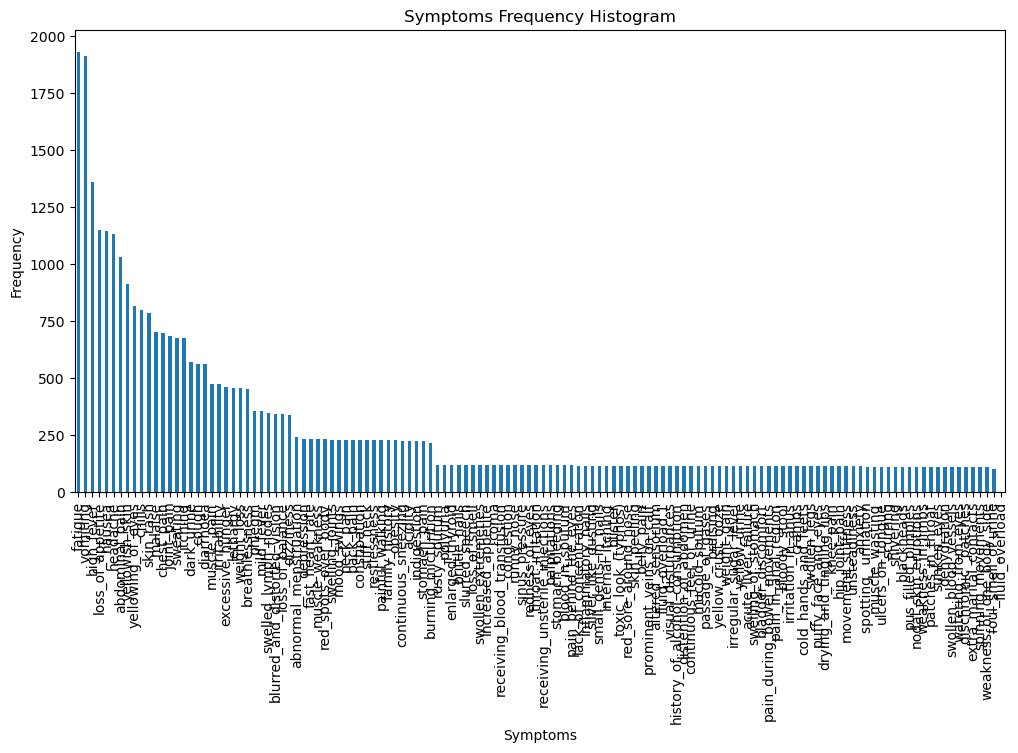

In [72]:
# Histogram
plt.figure(figsize=(12, 6))
df_train.drop('prognosis', axis=1).sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Symptoms Frequency Histogram')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

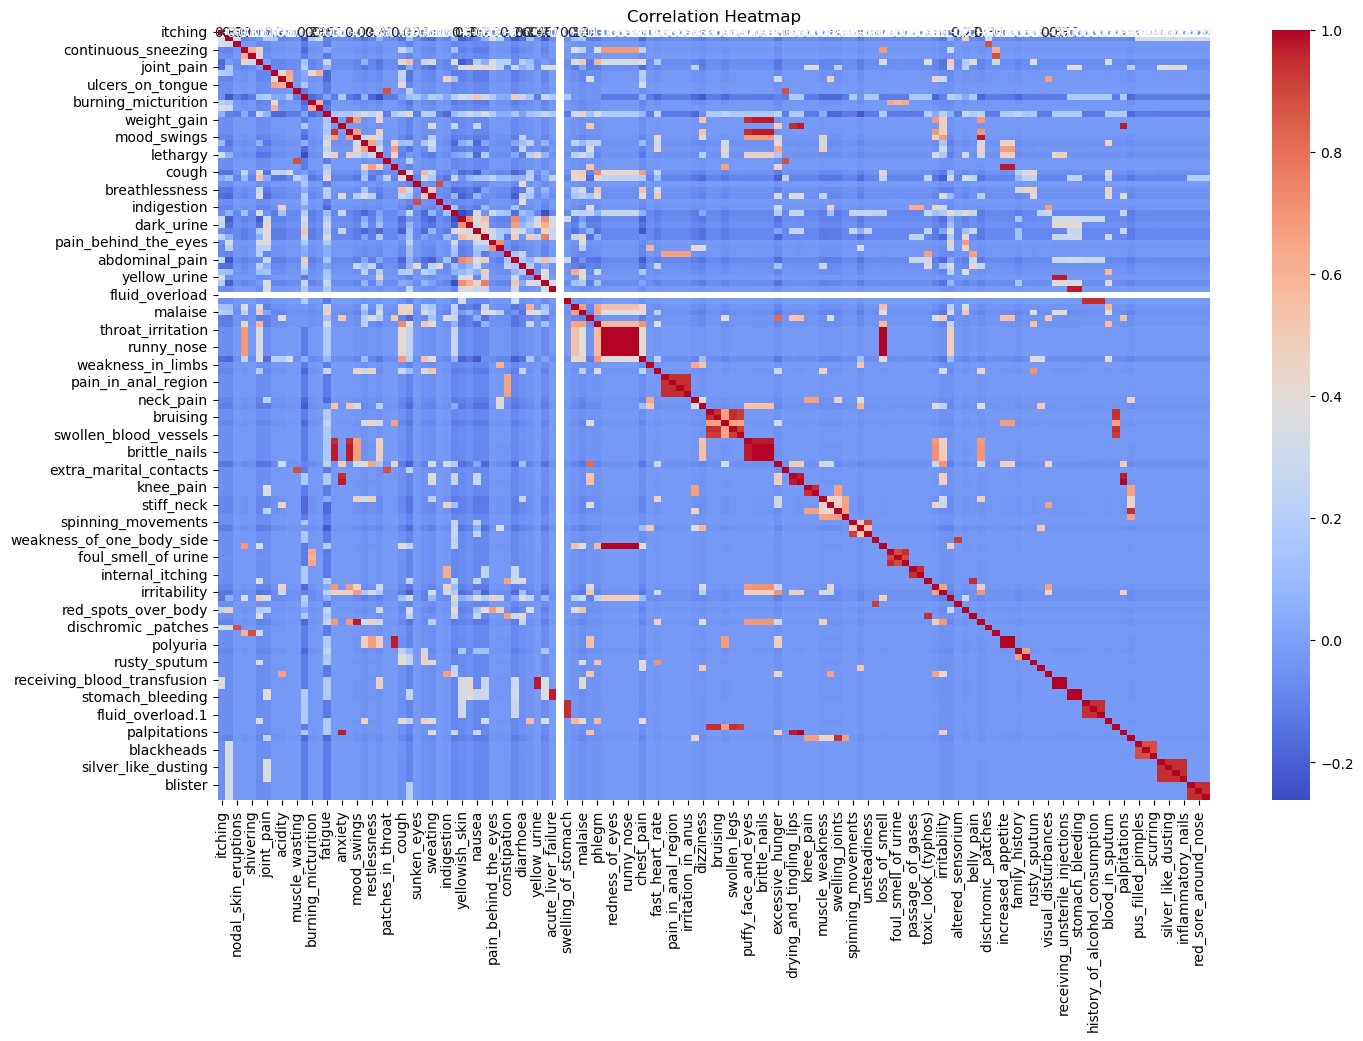

In [73]:
# Heatmap
plt.figure(figsize=(16, 10))
numeric_columns = df_train.select_dtypes(include='number').columns
correlation_matrix = df_train[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

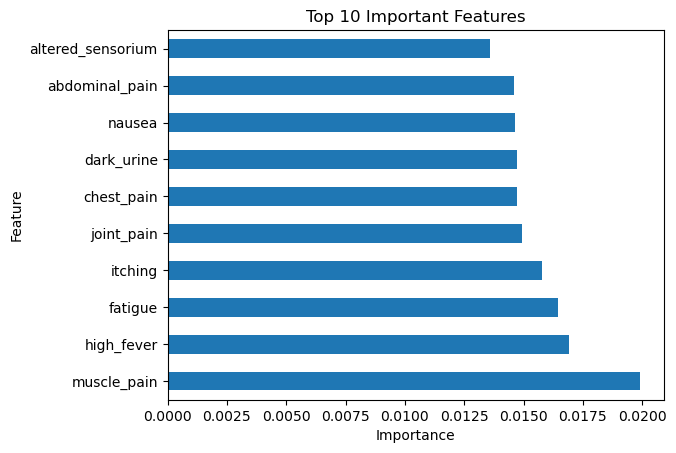

In [74]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [31]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [32]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
 
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


SVC, GAUSSIAN NB, RANDOM FOREST

In [33]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [36]:
y=encoder.fit_transform(y)
Y =encoder.fit_transform(Y)
y

array([15, 15, 15, ..., 38, 35, 27], dtype=int64)

In [37]:
Y

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300 , random_state=42,max_depth=25)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=300, random_state=42)

In [39]:
y_pred=rf.predict(x_test)
y_pred

array([ 2,  2, 24,  1,  9, 23, 25,  5, 19, 30, 38, 12, 21, 35,  3,  3, 13,
       22, 12,  7,  6, 40, 19,  6,  4, 20, 34, 30, 26, 30,  9, 19, 17, 22,
       39, 30, 28, 14, 34, 38, 20,  0, 23, 12, 28, 17, 25, 19, 35, 35, 18,
       36, 39,  4, 24, 20, 37, 10, 38, 33, 25, 24, 36, 18,  0, 26, 32,  1,
        0, 13, 15,  6,  2, 22, 26,  9, 27, 27, 10, 30, 16, 27, 16, 14, 19,
        1, 28, 17,  0, 11, 26, 29, 21,  3, 36, 17, 29, 18, 34, 11, 23,  6,
        3,  4, 33, 39, 16, 30, 22,  1, 21, 39, 18, 25, 12, 14, 26, 28, 25,
        3,  7, 35, 32,  8,  5, 34, 17, 24, 35, 31, 11,  7,  7,  7,  9,  2,
       19, 34, 13, 37, 33, 18, 35, 19, 21, 31, 14, 39, 36,  3, 12, 31, 33,
       37, 23, 37, 25, 21,  3,  4,  6, 28,  1, 18, 40, 37, 29,  6, 27, 24,
       40, 21, 40, 17, 34, 27,  1, 40, 10,  8, 29,  1,  4, 40, 30, 37, 12,
       19, 11, 38, 37,  2, 39, 34, 22,  8, 15,  7, 19, 31, 17, 40, 39, 11,
       15,  0, 16,  4,  9,  8, 19, 31, 18, 13, 17, 28, 29, 18,  9, 21, 11,
        3,  3, 23, 32, 40

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


In [41]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [42]:
test_prediction = rf.predict(X)
test_prediction

array([15, 15, 15, ..., 38, 35, 27], dtype=int64)

In [50]:
type(Y)

numpy.ndarray

In [51]:
type(test_prediction)

numpy.ndarray

In [52]:
Y_df = pd.DataFrame(Y, columns=["prognosis"])
test_pred_df = pd.DataFrame(test_prediction, columns=["predicted"])

In [53]:
result_df = Y_df.join(test_pred_df)

# Display the result DataFrame
print(result_df)

    prognosis  predicted
0          15         15
1           4         15
2          16         15
3           9         15
4          14         15
5          33         15
6           1         15
7          12         15
8          17         15
9           6         15
10         23          4
11         30          4
12          7          4
13         32          4
14         28          4
15         29          4
16          8          4
17         11          4
18         37          4
19         40          4
20         19         16
21         20         16
22         21         16
23         22         16
24          3         16
25         36         16
26         10         16
27         34         16
28         13         16
29         18         16
30         39          9
31         26          9
32         24          9
33         25          9
34         31          9
35          5          9
36          0          9
37          2          9
38         38          9


In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
dtree_pred=dtree.predict(x_test)

In [56]:
print(accuracy_score(y_test,dtree_pred))

1.0


In [57]:
dtree_pred.shape

(984,)

In [58]:
Y.shape

(42,)

In [83]:
dtree_pred_test= dtree.predict(X)

In [85]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)
scaled_x = scaler.transform(X)

In [86]:
from sklearn.svm import SVC
svm_clf = SVC(kernel ='linear', random_state = 52,C= 100)
svm_clf = svm_clf.fit(scaled_x_train,y_train)

In [87]:
svm_clf

SVC(C=100, kernel='linear', random_state=52)

In [99]:
pred_y=svm_clf.predict(scaled_x_test)

In [100]:
pred_x_test = svm_clf.predict(scaled_x)

In [101]:
models =[
    {'name':'RandomForest','model':RandomForestClassifier(),'params':{'n_estimators':[10,50,100],'max_depth':[5,10,None]}},
    {'name':'DecisionTree','model':DecisionTreeClassifier(),'params':{'max_depth':[5,10,None], 'min_sample_split':[2,5]}},
    {'name':'svm','model':SVC(),'params':{'kernel':['linear','rbf']}}
]

In [102]:
X_train = df_train.drop('prognosis', axis=1)
y_train = df_train['prognosis']
X_test = df_test.drop('prognosis', axis=1)
y_test = df_test['prognosis']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9761904761904762
